In [ ]:
# ============================================================
# 서울 경매 낙찰가 예측 프로젝트
# 올인원 초기 설정 및 데이터 로드
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


🏠 서울 경매 낙찰가 예측 모델 프로젝트
   - Phase 1: 환경 설정 및 데이터 로드

📦 STEP 1: 환경 설정

[1-1] 필수 라이브러리 설치 중...

[1-2] 라이브러리 로드 중...


In [ ]:
# 1-5. 랜덤 시드 고정
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [3]:
import koreanize_matplotlib

In [7]:
from glob import glob
source_files = glob("../data/*.csv")

In [ ]:
# 3-2. 전체 데이터 통합
df_all = pd.concat([pd.read_csv(file) for file in source_files])

In [17]:
df_all.rename({
    'm_code': 'm_code',
    '사건번호': 'case_id',
    '층': 'floor',
    '구': 'district',
    '동': 'dong',
    '용도': 'purpose',
    '토지면적': 'land_area',
    '건물면적': 'building_area',
    '감정가': 'appraisal_price',
    '최저가': 'minimum_price',
    '감정일': 'appraisal_date',
    '매각일': 'sale_date',
    '유찰횟수': 'failed_bid_count',
    '낙찰가': 'winning_bid_price',
    '보증금': 'deposit',
    '연도': 'year',
    '낙찰가율': 'winning_bid_ratio'
}, axis=1, inplace=True)

In [19]:
print(f"\n✅ STEP 3 완료: 데이터 로드 완료!")

# ============================================================
# STEP 4: 데이터 기본 정보 확인
# ============================================================

print("\n" + "=" * 80)
print("📋 STEP 4: 데이터 기본 정보")
print("=" * 80)

# 4-1. 데이터 크기
print(f"\n[4-1] 데이터 크기")
print(f"   - 행(건수): {len(df_all):,}개")
print(f"   - 열(변수): {len(df_all.columns)}개")

# 4-2. 컬럼 목록
print(f"\n[4-2] 컬럼 목록 ({len(df_all.columns)}개)")
print(f"   {df_all.columns.tolist()}")

# 4-3. 데이터 샘플
print(f"\n[4-3] 데이터 샘플 (첫 3행)")
display(df_all.head(3))

# 4-4. 데이터 타입
print(f"\n[4-4] 데이터 타입")
print(df_all.dtypes)



✅ STEP 3 완료: 데이터 로드 완료!

📋 STEP 4: 데이터 기본 정보

[4-1] 데이터 크기
   - 행(건수): 17,239개
   - 열(변수): 17개

[4-2] 컬럼 목록 (17개)
   ['m_code', 'case_id', 'floor', 'district', 'dong', 'purpose', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'appraisal_date', 'sale_date', 'failed_bid_count', 'winning_bid_price', 'deposit', 'year', 'winning_bid_ratio']

[4-3] 데이터 샘플 (첫 3행)


,m_code,case_id,floor,district,dong,purpose,land_area,building_area,appraisal_price,minimum_price,appraisal_date,sale_date,failed_bid_count,winning_bid_price,deposit,year,winning_bid_ratio
0,220190050677001,2019타경50677,8,성동구,성수동1가,아파트,36.4,194.46,3.630000e+09,1.189478e+09,2019-03-04,2020-09-14,5,1.352000e+09,0.0,2020,37.245179
1,120190003173001,2019타경3173,1,관악구,신림동,다가구,126.0,249.80,7.103746e+08,4.546400e+08,2019-05-16,2020-10-13,2,5.042100e+08,35000000.0,2020,70.978043
2,320190005280001,2019타경5280,3,서대문구,연희동,아파트,45.0,105.44,4.380000e+08,2.803200e+08,2019-10-11,2020-09-22,2,3.248800e+08,150000000.0,2020,74.173516



[4-4] 데이터 타입
m_code                 int64
case_id                  str
floor                  int64
district                 str
dong                     str
purpose                  str
land_area            float64
building_area        float64
appraisal_price      float64
minimum_price        float64
appraisal_date           str
sale_date                str
failed_bid_count       int64
winning_bid_price    float64
deposit              float64
year                   int64
winning_bid_ratio    float64
dtype: object


In [20]:
# ============================================================
# STEP 5: 데이터 품질 체크 (Data Quality Check)
# ============================================================

print("\n" + "=" * 80)
print("🔍 STEP 5: 데이터 품질 체크")
print("=" * 80)

# 5-1. 결측치 확인
print("\n[5-1] 결측치 현황")
missing = df_all.isnull().sum()
missing_pct = (missing / len(df_all) * 100).round(2)

missing_df = pd.DataFrame({
    '결측 개수': missing,
    '결측 비율(%)': missing_pct
}).sort_values('결측 개수', ascending=False)

print("\n결측치가 있는 컬럼:")
display(missing_df[missing_df['결측 개수'] > 0])

# 5-2. 타겟 변수 확인
print("\n[5-2] 타겟 변수 (낙찰가: winning_bid_price) 현황")
n_sold = df_all['winning_bid_price'].notna().sum()
n_unsold = df_all['winning_bid_price'].isna().sum()
sold_rate = n_sold / len(df_all) * 100

print(f"   - 낙찰 건수: {n_sold:,}개")
print(f"   - 유찰 건수: {n_unsold:,}개")
print(f"   - 낙찰률: {sold_rate:.2f}%")

# 5-3. 범주형 변수 분포
print("\n[5-3] 범주형 변수 분포")

print("\n   ① 용도 (purpose)")
print(df_all['purpose'].value_counts())

print("\n   ② 구 (district) - 상위 10개")
print(df_all['district'].value_counts().head(10))

print(f"\n   ③ 동 (dong)")
print(f"      - 고유값: {df_all['dong'].nunique()}개")
print(f"      - 상위 5개:")
print(df_all['dong'].value_counts().head(5))

# 5-4. 수치형 변수 통계
print("\n[5-4] 주요 수치 변수 범위")

numeric_cols = [
    'floor', 'land_area', 'building_area', 'appraisal_price', 
    'minimum_price', 'failed_bid_count', 'winning_bid_price', 'deposit'
]

stats_list = []
for col in numeric_cols:
    if col in df_all.columns:
        data = df_all[col].dropna()
        if len(data) > 0:
            stats_list.append({
                '변수': col,
                '최소': f"{data.min():,.0f}",
                '평균': f"{data.mean():,.0f}",
                '중앙값': f"{data.median():,.0f}",
                '최대': f"{data.max():,.0f}",
                '결측': f"{df_all[col].isna().sum():,}개"
            })

stats_df = pd.DataFrame(stats_list)
display(stats_df)

# 5-5. 연도별 분포
print("\n[5-5] 연도별 데이터 분포 (year)")
year_dist = df_all.groupby('year').agg({
    'case_id': 'count',
    'winning_bid_price': lambda x: x.notna().sum()
}).rename(columns={'case_id': '전체', 'winning_bid_price': '낙찰'})
year_dist['낙찰률(%)'] = (year_dist['낙찰'] / year_dist['전체'] * 100).round(2)
display(year_dist)

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 초기 데이터 로드 및 분석 완료!")
print("=" * 80)

print(f"""
📊 데이터 요약:
   - 전체 건수: {len(df_all):,}개
   - 기간: {df_all['year'].min()}년 ~ {df_all['year'].max()}년
   - 낙찰 건수: {n_sold:,}개 ({sold_rate:.1f}%)
   - 유찰 건수: {n_unsold:,}개
   - 컬럼 수: {len(df_all.columns)}개

🎯 다음 단계:
   1. EDA (탐색적 데이터 분석)
   2. 피처 엔지니어링
   3. 모델링
""")

print("=" * 80)


🔍 STEP 5: 데이터 품질 체크

[5-1] 결측치 현황

결측치가 있는 컬럼:


,결측 개수,결측 비율(%)



[5-2] 타겟 변수 (낙찰가: winning_bid_price) 현황
   - 낙찰 건수: 17,239개
   - 유찰 건수: 0개
   - 낙찰률: 100.00%

[5-3] 범주형 변수 분포

   ① 용도 (purpose)
purpose
다세대         11468
아파트          4113
연립            536
단독주택          532
오피스텔(주거)      292
다가구           271
근린주택           27
Name: count, dtype: int64

   ② 구 (district) - 상위 10개
district
강서구    3541
양천구    1373
구로구    1130
관악구    1047
은평구     959
금천구     886
동작구     716
성북구     701
강북구     696
도봉구     643
Name: count, dtype: int64

   ③ 동 (dong)
      - 고유값: 328개
      - 상위 5개:
dong
화곡동    2859
신월동     701
신림동     538
독산동     476
봉천동     444
Name: count, dtype: int64

[5-4] 주요 수치 변수 범위


,변수,최소,평균,중앙값,최대,결측
0,floor,1,4,3,58,0개
1,land_area,0,36,24,"13,528",0개
2,building_area,0,60,42,"5,066",0개
3,appraisal_price,"2,900,000","506,490,184","286,000,000","24,034,400,000",0개
4,minimum_price,"1,397,000","378,359,028","210,000,000","14,791,484,040",0개
5,failed_bid_count,0,2,1,21,0개
6,winning_bid_price,"1,629,999","431,454,779","237,000,000","15,200,200,000",0개
7,deposit,0,"152,703,020","150,000,000","100,000,002,013",0개



[5-5] 연도별 데이터 분포 (year)


,전체,낙찰,낙찰률(%)
year,,,
2020,1438,1438,100.0
2021,1527,1527,100.0
2022,1426,1426,100.0
2023,2145,2145,100.0
2024,5201,5201,100.0
2025,5502,5502,100.0



✅ 초기 데이터 로드 및 분석 완료!

📊 데이터 요약:
   - 전체 건수: 17,239개
   - 기간: 2020년 ~ 2025년
   - 낙찰 건수: 17,239개 (100.0%)
   - 유찰 건수: 0개
   - 컬럼 수: 17개

🎯 다음 단계:
   1. EDA (탐색적 데이터 분석)
   2. 피처 엔지니어링
   3. 모델링



In [21]:
# ============================================================
# STEP 6: 탐색적 데이터 분석 (EDA)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 6: 탐색적 데이터 분석 (EDA)")
print("=" * 80)

# 6-1. 타겟 변수 확인 (낙찰가율: winning_bid_ratio)
print("\n[6-1] 타겟 변수 확인: 낙찰가율 (winning_bid_ratio)")

# 낙찰된 데이터만 필터링
df_sold = df_all[df_all['winning_bid_price'].notna()].copy()

# 만약 winning_bid_ratio가 계산되어 있지 않다면 재계산 (낙찰가 / 감정가)
if 'winning_bid_ratio' not in df_all.columns:
    df_sold['winning_bid_ratio'] = (df_sold['winning_bid_price'] / df_sold['appraisal_price'])

print(f"   - 낙찰가율 범위: {df_sold['winning_bid_ratio'].min():.2f} ~ {df_sold['winning_bid_ratio'].max():.2f}")
print(f"   - 낙찰가율 평균: {df_sold['winning_bid_ratio'].mean():.2f} ({df_sold['winning_bid_ratio'].mean()*100:.1f}%)")
print(f"   - 낙찰가율 중앙: {df_sold['winning_bid_ratio'].median():.2f} ({df_sold['winning_bid_ratio'].median()*100:.1f}%)")



📊 STEP 6: 탐색적 데이터 분석 (EDA)

[6-1] 타겟 변수 확인: 낙찰가율 (winning_bid_ratio)
   - 낙찰가율 범위: 1.08 ~ 4406.33
   - 낙찰가율 평균: 86.12 (8611.9%)
   - 낙찰가율 중앙: 84.11 (8411.3%)



[6-2] 낙찰가율 분포 시각화


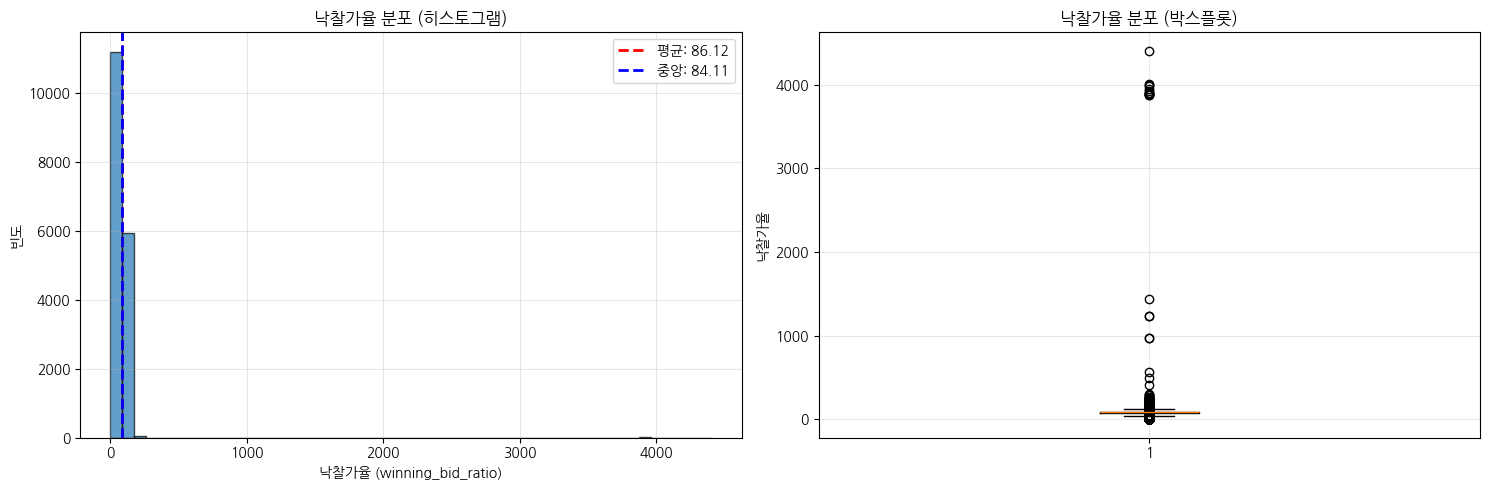

In [22]:
# 6-2. 낙찰가율 분포 시각화
print("\n[6-2] 낙찰가율 분포 시각화")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
axes[0].hist(df_sold['winning_bid_ratio'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df_sold['winning_bid_ratio'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'평균: {df_sold["winning_bid_ratio"].mean():.2f}')
axes[0].axvline(df_sold['winning_bid_ratio'].median(), color='blue',
                linestyle='--', linewidth=2, label=f'중앙: {df_sold["winning_bid_ratio"].median():.2f}')
axes[0].set_xlabel('낙찰가율 (winning_bid_ratio)')
axes[0].set_ylabel('빈도')
axes[0].set_title('낙찰가율 분포 (히스토그램)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 박스플롯
axes[1].boxplot(df_sold['winning_bid_ratio'], vert=True)
axes[1].set_ylabel('낙찰가율')
axes[1].set_title('낙찰가율 분포 (박스플롯)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 낙찰가율 이상치에 대한 추가 분석
- 진행예정


[6-3] 유찰횟수(failed_bid_count)별 낙찰가율 분석
                 winning_bid_ratio                                    
                             count     mean      std     min       max
failed_bid_count                                                      
0                             2243  113.558   49.278  16.851  1436.856
1                             6983   96.418  167.263   8.828  4406.327
2                             3832   76.591   12.093  10.371   490.283
3                             1458   68.874   36.794  10.629  1239.616
4                              597   67.458   21.237  36.724   203.880
5                              424   71.058   21.430  32.768   134.688
6                              307   65.229   24.577  26.214   122.316
7                              292   62.164   26.046  20.971   103.311
8                              221   63.849   28.078  16.777   139.003
9                              161   60.978   31.379  13.421   125.758
10                             154   5

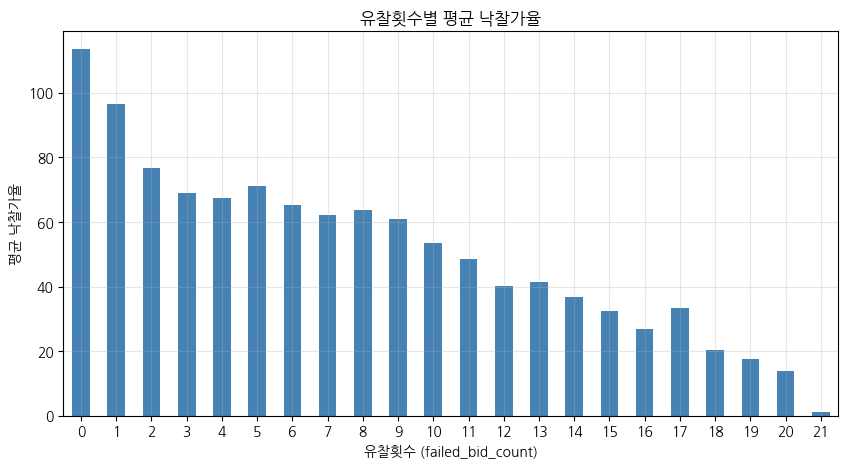

<Figure size 1000x500 with 0 Axes>

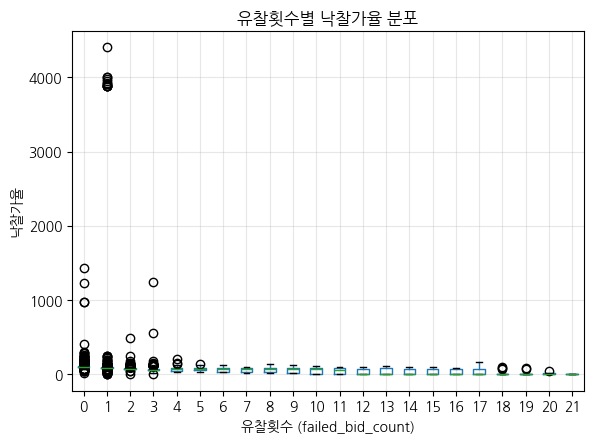

In [24]:
# 6-3. 유찰횟수(failed_bid_count)별 낙찰가율
print("\n[6-3] 유찰횟수(failed_bid_count)별 낙찰가율 분석")

auction_analysis = df_sold.groupby('failed_bid_count').agg({
    'winning_bid_ratio': ['count', 'mean', 'std', 'min', 'max']
}).round(3)

print(auction_analysis)

# 시각화
# 1. 유찰횟수별 평균 낙찰가율 (Bar Chart)
plt.figure(figsize=(10, 5))
df_sold.groupby('failed_bid_count')['winning_bid_ratio'].mean().plot(kind='bar', color='steelblue')
plt.xlabel('유찰횟수 (failed_bid_count)')
plt.ylabel('평균 낙찰가율')
plt.title('유찰횟수별 평균 낙찰가율')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

# 2. 유찰횟수별 낙찰가율 분포 (Boxplot)
plt.figure(figsize=(10, 5))
df_sold.boxplot(column='winning_bid_ratio', by='failed_bid_count')
plt.xlabel('유찰횟수 (failed_bid_count)')
plt.ylabel('낙찰가율')
plt.title('유찰횟수별 낙찰가율 분포')
plt.suptitle('') # pandas boxplot의 기본 상단 타이틀 제거
plt.grid(alpha=0.3)
plt.show()

In [25]:
def remove_auction_outliers(df, column='winning_bid_ratio', group_col='failed_bid_count'):
    """
    유찰횟수별로 그룹화하여 IQR 방식으로 이상치를 제거하고, 
    경매 상식 범위를 벗어나는 글로벌 이상치를 처리합니다.
    """
    before_cnt = len(df)
    
    # 1. 글로벌 필터링 (경매 상식: 낙찰가율이 10% 미만이거나 200% 초과인 경우 제거)
    # 데이터 단위가 0.84 같은 비율이라면 0.1 ~ 2.0으로 수정하세요.
    df = df[(df[column] >= 10) & (df[column] <= 200)].copy()
    
    # 2. 그룹별 IQR 필터링 (유찰횟수별 분포에 맞춤)
    def get_group_bounds(x):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        # 경매 데이터 특성상 상단 이상치가 치명적이므로 상단 경계(1.5배)를 엄격히 적용
        return q1 - 1.5 * iqr, q3 + 1.5 * iqr

    # 각 그룹별로 경계값을 계산하여 필터링
    filtered_df = pd.DataFrame()
    for name, group in df.groupby(group_col):
        lower, upper = get_group_bounds(group[column])
        # 그룹 내 정상 범위 데이터만 추출
        cleaned_group = group[(group[column] >= lower) & (group[column] <= upper)]
        filtered_df = pd.concat([filtered_df, cleaned_group])
    
    after_cnt = len(filtered_df)
    print(f"제거된 이상치 건수: {before_cnt - after_cnt:,}개 (전체의 {(before_cnt - after_cnt)/before_cnt*100:.2f}%)")
    
    return filtered_df


제거된 이상치 건수: 799개 (전체의 4.63%)


<Figure size 1200x600 with 0 Axes>

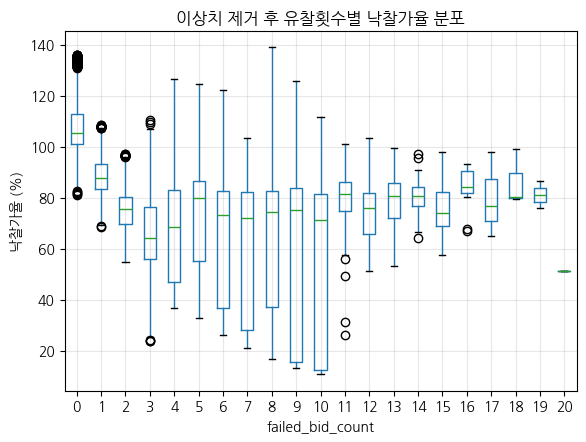

In [26]:

# 이상치 제거 실행
df_sold_cleaned = remove_auction_outliers(df_sold)

# 제거 후 시각화 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_sold_cleaned.boxplot(column='winning_bid_ratio', by='failed_bid_count')
plt.title('이상치 제거 후 유찰횟수별 낙찰가율 분포')
plt.suptitle('')
plt.ylabel('낙찰가율 (%)')
plt.grid(alpha=0.3)
plt.show()

In [27]:
df_sold = df_sold_cleaned


[6-4] 지역(district)별 낙찰가율 분석

상위 10개 구:
           건수  평균_낙찰가율
district              
용산구       164   93.174
성동구       170   90.878
광진구       336   90.553
강남구       369   88.303
마포구       402   87.871
송파구       519   87.726
영등포구      329   86.999
서초구       335   86.668
중구        106   86.396
동작구       680   86.197

하위 10개 구:
            건수  평균_낙찰가율
district               
양천구       1309   83.469
구로구       1081   82.995
중랑구        554   82.879
금천구        846   82.644
도봉구        627   81.467
은평구        911   81.398
종로구        195   81.163
강북구        658   80.836
관악구        984   80.635
강서구       3415   78.490


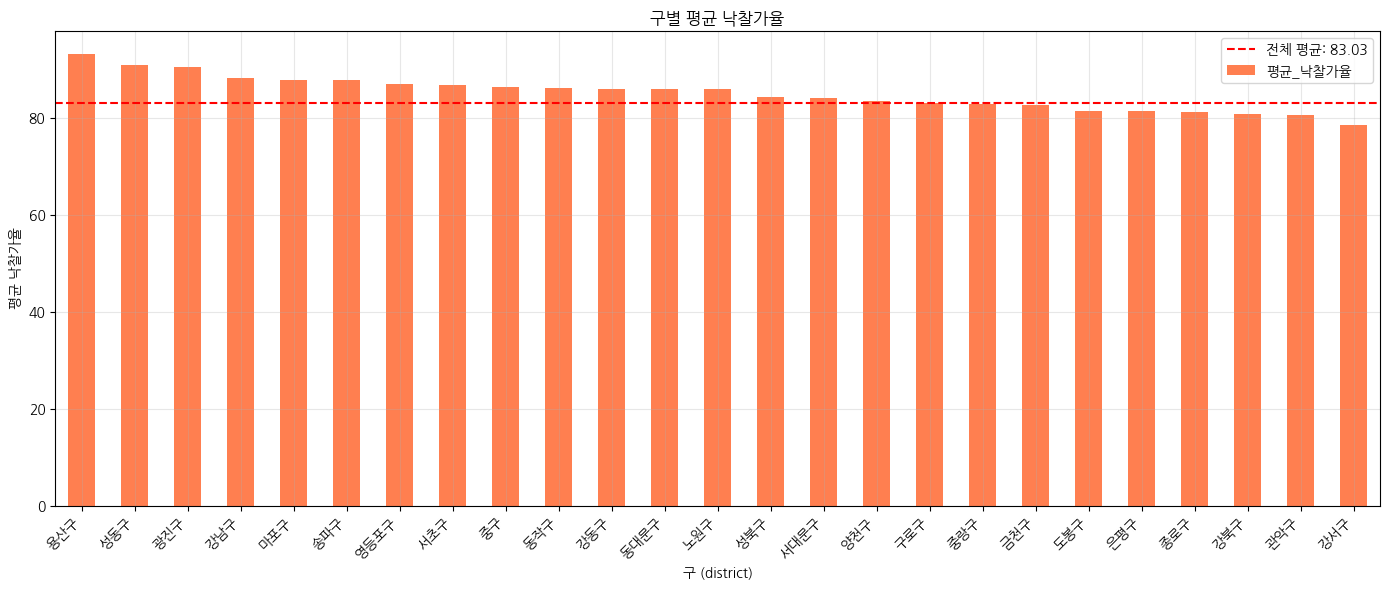

In [28]:

# 6-4. 지역(district)별 낙찰가율
print("\n[6-4] 지역(district)별 낙찰가율 분석")

district_analysis = df_sold.groupby('district').agg({
    'winning_bid_ratio': ['count', 'mean']
}).round(3)
district_analysis.columns = ['건수', '평균_낙찰가율']
district_analysis = district_analysis.sort_values('평균_낙찰가율', ascending=False)

print("\n상위 10개 구:")
print(district_analysis.head(10))

print("\n하위 10개 구:")
print(district_analysis.tail(10))

# 시각화
plt.figure(figsize=(14, 6))
district_analysis['평균_낙찰가율'].plot(kind='bar', color='coral')
plt.xlabel('구 (district)')
plt.ylabel('평균 낙찰가율')
plt.title('구별 평균 낙찰가율')
plt.xticks(rotation=45, ha='right')
plt.axhline(df_sold['winning_bid_ratio'].mean(), color='red',
            linestyle='--', label=f'전체 평균: {df_sold["winning_bid_ratio"].mean():.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



[6-5] 용도(purpose)별 낙찰가율 분석
         winning_bid_ratio                
                     count    mean     std
purpose                                   
근린주택                    26  77.224  15.723
다가구                    263  78.516  17.109
다세대                  10881  80.714  17.593
단독주택                   498  78.982  19.860
아파트                   3984  89.991  15.847
연립                     513  86.922  16.081
오피스텔(주거)               275  78.726  18.386


<Figure size 1000x600 with 0 Axes>

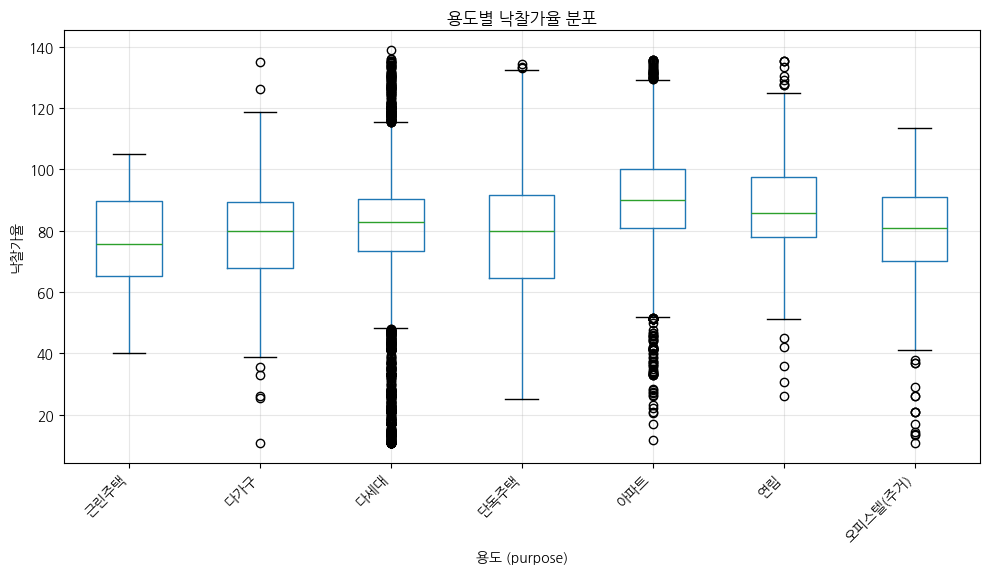

In [29]:
# 6-5. 용도(purpose)별 낙찰가율
print("\n[6-5] 용도(purpose)별 낙찰가율 분석")

purpose_analysis = df_sold.groupby('purpose').agg({
    'winning_bid_ratio': ['count', 'mean', 'std']
}).round(3)

print(purpose_analysis)

# 시각화
plt.figure(figsize=(10, 6))
df_sold.boxplot(column='winning_bid_ratio', by='purpose', figsize=(10, 6))
plt.xlabel('용도 (purpose)')
plt.ylabel('낙찰가율')
plt.title('용도별 낙찰가율 분포')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [30]:

# 6-6. 보증금(deposit) 영향 분석
print("\n[6-6] 보증금 영향 분석")

# 보증금비율 생성
df_sold['deposit_ratio'] = df_sold['deposit'] / df_sold['appraisal_price']

# 보증금 유무별 비교
with_deposit = df_sold[df_sold['deposit'].notna() & (df_sold['deposit'] > 0)]
without_deposit = df_sold[df_sold['deposit'].isna() | (df_sold['deposit'] == 0)]

print(f"\n보증금 있음: {len(with_deposit):,}개")
print(f"   - 평균 낙찰가율: {with_deposit['winning_bid_ratio'].mean():.3f}")
print(f"\n보증금 없음: {len(without_deposit):,}개")
print(f"   - 평균 낙찰가율: {without_deposit['winning_bid_ratio'].mean():.3f}")



[6-6] 보증금 영향 분석

보증금 있음: 11,270개
   - 평균 낙찰가율: 81.316

보증금 없음: 5,170개
   - 평균 낙찰가율: 86.766


In [31]:
# t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(with_deposit['winning_bid_ratio'],
                             without_deposit['winning_bid_ratio'])
print(f"\nt-test 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"   → 보증금 유무에 따른 낙찰가율 차이 통계적으로 유의미! ✅")



t-test 결과:
   - t-통계량: -18.520
   - p-value: 0.0000
   → 보증금 유무에 따른 낙찰가율 차이 통계적으로 유의미! ✅



[6-7] 연도(year)별 낙찰가율 트렌드
     winning_bid_ratio                
                 count    mean     std
year                                  
2020              1352  89.063  17.984
2021              1416  88.177  21.686
2022              1359  84.021  21.433
2023              2011  77.286  17.413
2024              4995  82.816  14.811
2025              5307  82.242  17.155


<Figure size 1000x500 with 0 Axes>

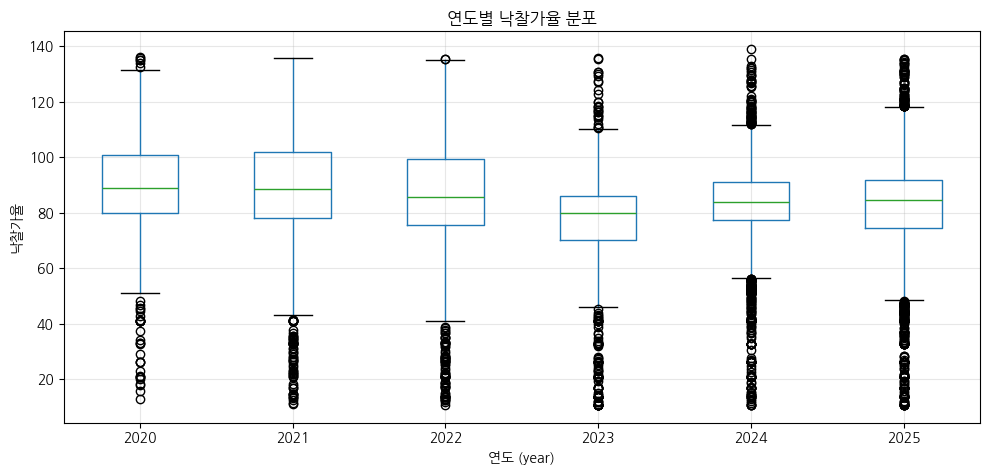


✅ EDA 완료!


In [32]:
# 6-7. 연도(year)별 트렌드
print("\n[6-7] 연도(year)별 낙찰가율 트렌드")

year_trend = df_sold.groupby('year').agg({
    'winning_bid_ratio': ['count', 'mean', 'std']
}).round(3)

print(year_trend)

plt.figure(figsize=(10, 5))
df_sold.boxplot(column='winning_bid_ratio', by='year', figsize=(10, 5))
plt.xlabel('연도 (year)')
plt.ylabel('낙찰가율')
plt.title('연도별 낙찰가율 분포')
plt.suptitle('')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ EDA 완료!")
print("=" * 80)

https://madangs.com/caview?m_code=0420210111165001   보니까 진짜 감정가 14배에 낙찰된 케이스가있음( 570만원에서 약 8200까지감) -> 얘는 그냥 이상치로 분류하겠음


📊 낙찰가율 분포 상세 (winning_bid_ratio)

낙찰가율 백분위수:
    50.0%ile:   84.04%
    75.0%ile:   92.91%
    90.0%ile:  102.04%
    95.0%ile:  108.01%
    99.0%ile:  124.73%
    99.5%ile:  129.90%
    99.9%ile:  135.05%
   100.0%ile:  139.00%

낙찰가율 구간별 분포:
winning_bid_ratio_bin
<50%         629
50-70%      2334
70-90%      8186
90-100%     2909
100-120%    2110
120-150%     272
150-200%       0
>200%          0
Name: count, dtype: int64


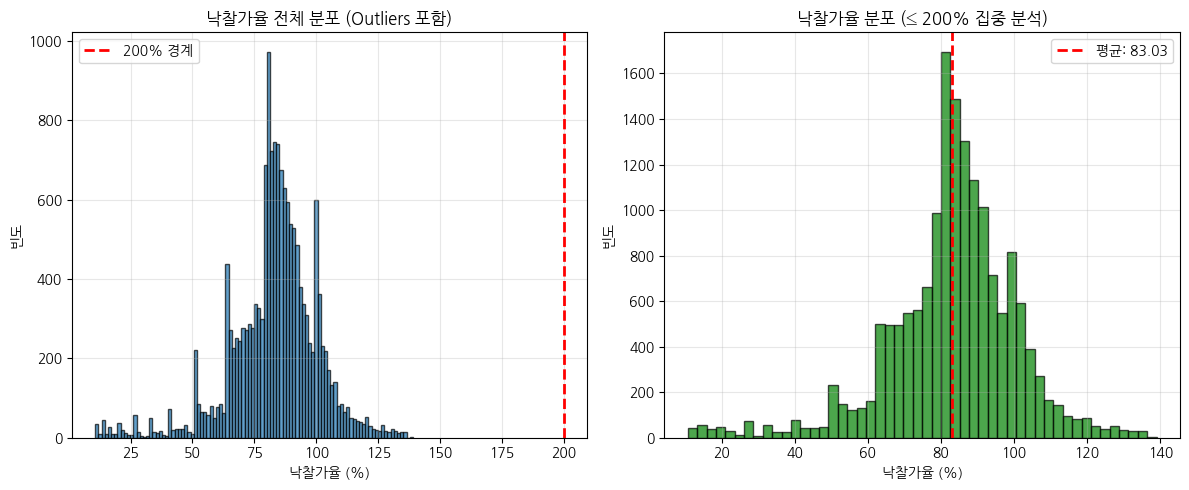


[데이터 품질 요약]
   - 정상 범위 (≤ 200%): 16,440개 (100.00%)
   - 이상치 범위 (> 200%): 0개 (0.00%)


In [34]:
# ============================================================
# 낙찰가율 분포 상세 분석 (Detailed Analysis of winning_bid_ratio)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "=" * 80)
print("📊 낙찰가율 분포 상세 (winning_bid_ratio)")
print("=" * 80)

# 백분위수 확인
percentiles = [50, 75, 90, 95, 99, 99.5, 99.9, 100]
print("\n낙찰가율 백분위수:")
for p in percentiles:
    value = np.percentile(df_sold['winning_bid_ratio'], p)
    # 데이터가 % 단위(예: 86.12)이므로 그대로 출력
    print(f"   {p:5.1f}%ile: {value:7.2f}%")

# 구간별 개수 (데이터가 % 단위이므로 단위를 100배 조정하여 구간 설정)
print("\n낙찰가율 구간별 분포:")
bins = [0, 50, 70, 90, 100, 120, 150, 200, 10000]
labels = ['<50%', '50-70%', '70-90%', '90-100%', '100-120%', '120-150%', '150-200%', '>200%']

df_sold['winning_bid_ratio_bin'] = pd.cut(df_sold['winning_bid_ratio'], bins=bins, labels=labels)
print(df_sold['winning_bid_ratio_bin'].value_counts().sort_index())

# 시각화
plt.figure(figsize=(12, 5))

# 전체 분포 (Scale 이슈 확인용)
plt.subplot(1, 2, 1)
plt.hist(df_sold['winning_bid_ratio'], bins=100, edgecolor='black', alpha=0.7)
plt.axvline(200.0, color='red', linestyle='--', linewidth=2, label='200% 경계')
plt.xlabel('낙찰가율 (%)')
plt.ylabel('빈도')
plt.title('낙찰가율 전체 분포 (Outliers 포함)')
plt.legend()
plt.grid(alpha=0.3)

# 확대 (정상 범위 0~200%)
plt.subplot(1, 2, 2)
df_sold_normal = df_sold[df_sold['winning_bid_ratio'] <= 200.0]
plt.hist(df_sold_normal['winning_bid_ratio'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(df_sold_normal['winning_bid_ratio'].mean(), color='red',
            linestyle='--', linewidth=2, label=f'평균: {df_sold_normal["winning_bid_ratio"].mean():.2f}')
plt.xlabel('낙찰가율 (%)')
plt.ylabel('빈도')
plt.title('낙찰가율 분포 (≤ 200% 집중 분석)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 요약 통계
outliers_count = len(df_sold[df_sold['winning_bid_ratio'] > 200.0])
print(f"\n[데이터 품질 요약]")
print(f"   - 정상 범위 (≤ 200%): {len(df_sold_normal):,}개 ({len(df_sold_normal)/len(df_sold)*100:.2f}%)")
print(f"   - 이상치 범위 (> 200%): {outliers_count:,}개 ({outliers_count/len(df_sold)*100:.2f}%)")

In [36]:
# ============================================================
# STEP 7: 피처 엔지니어링 & 전처리 (English Schema Version)
# ============================================================

print("\n" + "=" * 80)
print("🔧 STEP 7: 피처 엔지니어링 & 전처리")
print("=" * 80)



🔧 STEP 7: 피처 엔지니어링 & 전처리


In [37]:
# ============================================================
# 7-1. 파생 변수 생성 (Feature Generation)
# ============================================================

print("\n[7-1] 파생 변수 생성")

# 분석 대상 데이터 복사
df_featured = df_sold.copy()

# ① 기본 비율 변수
print("\n   ① 기본 비율 변수 생성")
df_featured['minimum_price_ratio'] = df_featured['minimum_price'] / df_featured['appraisal_price']
df_featured['deposit_ratio'] = df_featured['deposit'] / df_featured['appraisal_price']
df_featured['land_building_ratio'] = df_featured['building_area'] / (df_featured['land_area'] + 1)  # 0 방지
df_featured['price_per_area'] = df_featured['appraisal_price'] / (df_featured['building_area'] + 1)

print(f"      - 최저가율(avg): {df_featured['minimum_price_ratio'].mean():.3f}")
print(f"      - 보증금비율(avg): {df_featured['deposit_ratio'].mean():.3f}")
print(f"      - 건물/토지 비율(avg): {df_featured['land_building_ratio'].mean():.3f}")
print(f"      - 평당감정가(avg): {df_featured['price_per_area'].mean():,.0f}원")

# ② 이진 변수 (Binary Features)
print("\n   ② 이진 변수 생성")
df_featured['has_deposit'] = (df_featured['deposit'].notna() & (df_featured['deposit'] > 0)).astype(int)
df_featured['excess_deposit'] = (df_featured['deposit'] > df_featured['appraisal_price']).astype(int)
df_featured['is_new_case'] = (df_featured['failed_bid_count'] == 0).astype(int)

print(f"      - 보증금 있음: {df_featured['has_deposit'].sum():,}개 ({df_featured['has_deposit'].mean()*100:.1f}%)")
print(f"      - 선순위 초과: {df_featured['excess_deposit'].sum():,}개 ({df_featured['excess_deposit'].mean()*100:.1f}%)")
print(f"      - 신건(유찰0회): {df_featured['is_new_case'].sum():,}개 ({df_featured['is_new_case'].mean()*100:.1f}%)")

# ③ 날짜 파생 변수
print("\n   ③ 날짜 파생 변수 (sale_date)")
df_featured['sale_date'] = pd.to_datetime(df_featured['sale_date'], format='mixed', errors='coerce')
df_featured['sale_month'] = df_featured['sale_date'].dt.month
df_featured['sale_quarter'] = df_featured['sale_date'].dt.quarter

# sale_year는 기존 year 컬럼이 있으나, 정확도를 위해 sale_date에서 다시 추출 가능
df_featured['sale_year_extracted'] = df_featured['sale_date'].dt.year

print(f"      - 매각 월 범위: {df_featured['sale_month'].min():.0f} ~ {df_featured['sale_month'].max():.0f}")



[7-1] 파생 변수 생성

   ① 기본 비율 변수 생성
      - 최저가율(avg): 0.728
      - 보증금비율(avg): 0.500
      - 건물/토지 비율(avg): 1.832
      - 평당감정가(avg): 8,356,272원

   ② 이진 변수 생성
      - 보증금 있음: 11,270개 (68.6%)
      - 선순위 초과: 1,625개 (9.9%)
      - 신건(유찰0회): 2,069개 (12.6%)

   ③ 날짜 파생 변수 (sale_date)
      - 매각 월 범위: 1 ~ 12


In [51]:
# 7-2. PRIMARY KEY 별도 저장
df_primary_key = df_featured['case_id'].copy()
df_featured = df_featured.drop(columns=['case_id'])

In [54]:
# DONG 데이터 제거
df_featured = df_featured.drop(columns=['dong'])

In [52]:
# ============================================================
# 7-3. Train/Test 분할 (Time-based Split)
# ============================================================

print("[7-3] Train/Test 분할 (2025년 기준)")

# year 컬럼 기반 분할
df_train = df_featured[df_featured['year'] < 2025].copy()
df_test = df_featured[df_featured['year'] == 2025].copy()

print(f"   - Train (Before 2025): {len(df_train):,}개")
print(f"   - Test  (2025 Only):   {len(df_test):,}개")


[7-3] Train/Test 분할 (2025년 기준)
   - Train (Before 2025): 11,133개
   - Test  (2025 Only):   5,307개


In [57]:
[df_train.groupby(col).agg('size') for col in df_train.select_dtypes(include=['object']).columns]

[district
 강남구      268
 강동구      357
 강북구      484
 강서구     2206
 관악구      659
 광진구      240
 구로구      660
 금천구      512
 노원구      338
 도봉구      434
 동대문구     227
 동작구      477
 마포구      303
 서대문구     371
 서초구      259
 성동구      122
 성북구      426
 송파구      319
 양천구      894
 영등포구     213
 용산구      120
 은평구      674
 종로구      155
 중구        79
 중랑구      336
 dtype: int64,
 dong
 가락동     50
 가리봉동    31
 가산동     50
 가양동     25
 가회동      2
         ..
 효창동      2
 후암동     13
 휘경동     32
 흑석동      9
 흥인동      1
 Length: 308, dtype: int64,
 purpose
 근린주택           7
 다가구          184
 다세대         7138
 단독주택         365
 아파트         2800
 연립           388
 오피스텔(주거)     251
 dtype: int64,
 appraisal_date
 2010-09-07    1
 2014-09-15    1
 2014-11-28    1
 2015-05-27    1
 2015-06-03    1
              ..
 2024-08-02    1
 2024-08-05    2
 2024-08-09    1
 2024-08-19    4
 2024-09-23    1
 Length: 1860, dtype: int64]

In [58]:

# ============================================================
# 7-4. 범주형 변수 인코딩 (Encoding)
# ============================================================

print("\n[7-4] 범주형 변수 인코딩 (Target Encoding)")

# ① 용도(purpose) -> One-Hot Encoding
purpose_train = pd.get_dummies(df_train['purpose'], prefix='purpose')
purpose_test = pd.get_dummies(df_test['purpose'], prefix='purpose')

# 구(district) -> One-Hot Encoding
district_train = pd.get_dummies(df_train['district'], prefix='district')
district_test = pd.get_dummies(df_test['district'], prefix='district')



[7-4] 범주형 변수 인코딩 (Target Encoding)


In [61]:
# 컬럼 정렬 (Train에는 있고 Test에는 없는 용도 처리)
for col in purpose_train.columns:
    if col not in purpose_test.columns:
        purpose_test[col] = 0
purpose_test = purpose_test[purpose_train.columns]

# ② 지역(district, dong) -> Target Encoding
# 주의: 오직 Train 데이터의 평균값만 사용해야 Data Leakage를 방지할 수 있습니다.
district_mean = df_train.groupby('district')['winning_bid_ratio'].mean()
global_mean = df_train['winning_bid_ratio'].mean()

# district 적용
df_train['district_encoded'] = df_train['district'].map(district_mean)
df_test['district_encoded'] = df_test['district'].map(district_mean).fillna(global_mean)

# # dong 적용
# dong_mean = df_train.groupby('dong')['winning_bid_ratio'].mean()
# df_train['dong_encoded'] = df_train['dong'].map(dong_mean)
# df_test['dong_encoded'] = df_test['dong'].map(dong_mean)

# # Test에만 있는 새로운 '동'은 해당 '구'의 평균으로 대체
# test_new_dong = df_test['dong_encoded'].isna()
# if test_new_dong.sum() > 0:
#     print(f"   - Test 신규 '동' {test_new_dong.sum()}개 처리 (구 평균 적용)")
#     for idx in df_test[test_new_dong].index:
#         dist = df_test.loc[idx, 'district']
#         df_test.loc[idx, 'dong_encoded'] = district_mean.get(dist, global_mean)

# One-Hot 결합
df_train = pd.concat([df_train, purpose_train], axis=1)
df_test = pd.concat([df_test, purpose_test], axis=1)

# ============================================================
# 7-5. 최종 피처 선택 및 데이터셋 구성
# ============================================================

print("\n[7-5] 최종 피처 선택")

# 모델링에 사용할 컬럼 리스트
feature_cols = [
    # 수치형
    'floor', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'failed_bid_count',
    # 파생 수치
    'minimum_price_ratio', 'deposit_ratio', 'land_building_ratio', 'price_per_area',
    # 이진형
    'has_deposit', 'excess_deposit', 'is_new_case',
    # 시간형
    'sale_month', 'sale_quarter',
    # 인코딩
    'district_encoded',
    #  'dong_encoded'
]

# One-Hot 컬럼 추가
purpose_cols = [col for col in df_train.columns if col.startswith('purpose_')]
feature_cols.extend(purpose_cols)
district_cols = [col for col in df_train.columns if col.startswith('district_')]
feature_cols.extend(district_cols)

# X, y 분리
X_train = df_train[feature_cols].copy()
y_train = df_train['winning_bid_ratio'].copy()

X_test = df_test[feature_cols].copy()
y_test = df_test['winning_bid_ratio'].copy()

print(f"   ✅ 최종 피처 개수: {len(feature_cols)}개")
print(f"   ✅ X_train shape: {X_train.shape}")
print(f"   ✅ X_test shape:  {X_test.shape}")

# ============================================================
# 최종 확인
# ============================================================

print("\n" + "=" * 80)
print("✅ 피처 엔지니어링 & 전처리 완료!")
print("=" * 80)


[7-5] 최종 피처 선택
   ✅ 최종 피처 개수: 31개
   ✅ X_train shape: (11133, 45)
   ✅ X_test shape:  (5307, 45)

✅ 피처 엔지니어링 & 전처리 완료!


In [65]:
# ============================================================
# STEP 8: 베이스라인 모델 (Naive Mean)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 8: 베이스라인 모델 (Naive Mean)")
print("=" * 80)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 베이스라인 예측: Train 평균값
baseline_pred = np.full(len(y_test), y_train.mean())

# 평가
mae_baseline = mean_absolute_error(y_test, baseline_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_pred))
r2_baseline = r2_score(y_test, baseline_pred)

print(f"\n베이스라인 (평균 예측: {y_train.mean():.3f})")
print(f"   - MAE:  {mae_baseline:.4f}")
print(f"   - RMSE: {rmse_baseline:.4f}")
print(f"   - R²:   {r2_baseline:.4f}")


📊 STEP 8: 베이스라인 모델 (Naive Mean)

베이스라인 (평균 예측: 83.405)
   - MAE:  12.2888
   - RMSE: 17.1922
   - R²:   -0.0046


In [ ]:
# ============================================================
# STEP 9: Linear Regression (선형 회귀)
# ============================================================

print("\n" + "=" * 80)
print("📈 STEP 9: Linear Regression (선형 회귀)")
print("=" * 80)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 스케일링 (선형 모델은 스케일에 민감)
print("\n[9-1] 피처 스케일링")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   ✅ StandardScaler 적용 완료")

# Linear Regression 모델 학습
print("\n[9-2] Linear Regression 모델 학습")

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

print("   ✅ 학습 완료")

# 예측
y_pred_linear = linear.predict(X_test_scaled)

# 평가
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\n[9-3] Linear Regression 성능")
print(f"   - MAE:  {mae_linear:.4f}")
print(f"   - RMSE: {rmse_linear:.4f}")
print(f"   - R²:   {r2_linear:.4f}")


📈 STEP 9: Linear Regression (선형 회귀)

[9-1] 피처 스케일링
   ✅ StandardScaler 적용 완료

[9-2] Linear Regression 모델 학습
   ✅ 학습 완료

[9-3] Linear Regression 성능
   - MAE:  7.0838
   - RMSE: 10.7880
   - R²:   0.6044


In [67]:
# 회귀 수식 확인
print(f"\n[9-4] 회귀 수식 (y = a₁x₁ + a₂x₂ + ... + b)")
print(f"   - 계수(coefficient) 개수: {len(linear.coef_)}개")
print(f"   - 절편(intercept): {linear.intercept_:.3f}")

# ============================================================
# STEP 10: 베이스라인 vs Linear Regression 비교
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 10: 성능 비교")
print("=" * 80)

comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression'],
    'MAE': [mae_baseline, mae_linear],
    'RMSE': [rmse_baseline, rmse_linear],
    'R²': [r2_baseline, r2_linear]
})

print("\n성능 비교표:")
display(comparison)



[9-4] 회귀 수식 (y = a₁x₁ + a₂x₂ + ... + b)
   - 계수(coefficient) 개수: 45개
   - 절편(intercept): 83.405

📊 STEP 10: 성능 비교

성능 비교표:


,Model,MAE,RMSE,R²
0,Baseline (평균),12.288795,17.192241,-0.004594
1,Linear Regression,7.083755,10.787966,0.604447


In [68]:
# 개선율
improvement_mae = (mae_baseline - mae_linear) / mae_baseline * 100
improvement_rmse = (rmse_baseline - rmse_linear) / rmse_baseline * 100

print(f"\n개선율:")
print(f"   - MAE:  {improvement_mae:.1f}% 개선 ✅")
print(f"   - RMSE: {improvement_rmse:.1f}% 개선 ✅")



개선율:
   - MAE:  42.4% 개선 ✅
   - RMSE: 37.3% 개선 ✅


In [69]:
# ============================================================
# STEP 11: 통계적 검정 (H1: Linear vs Baseline)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 11: 통계적 검정 (H1: Linear Regression vs Baseline)")
print("=" * 80)

from scipy.stats import ttest_rel

# 잔차 계산
residuals_baseline = np.abs(y_test - baseline_pred)
residuals_linear = np.abs(y_test - y_pred_linear)

# Paired t-test
t_stat, p_value = ttest_rel(residuals_baseline, residuals_linear)

# Cohen's d (효과 크기)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohens_d(residuals_baseline, residuals_linear)

print(f"\n가설 검정:")
print(f"   H0: Linear Regression = Baseline (차이 없음)")
print(f"   H1: Linear Regression < Baseline (Linear가 더 좋음)")

print(f"\n검정 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value:  {p_value:.6f}")
print(f"   - Cohen's d: {d:.3f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p < 0.05 → H0 기각")
    print(f"   Linear Regression이 Baseline보다 통계적으로 유의하게 우수!")

    if abs(d) > 0.8:
        effect = "큰"
    elif abs(d) > 0.5:
        effect = "중간"
    elif abs(d) > 0.2:
        effect = "작은"
    else:
        effect = "매우 작은"

    print(f"   효과 크기: {effect} 효과 (d={d:.3f})")
else:
    print(f"\n❌ 결론: p ≥ 0.05 → H0 채택")
    print(f"   Linear Regression과 Baseline 차이 없음")

print("\n" + "=" * 80)
print("✅ 베이스라인 & Linear Regression 모델링 완료!")
print("=" * 80)

print(f"""
📊 요약:
   - Baseline MAE:         {mae_baseline:.4f}
   - Linear Regression MAE: {mae_linear:.4f}
   - 개선율:                {improvement_mae:.1f}%
   - p-value:               {p_value:.6f}
   - 통계적 유의성:          {"✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"}

💬 발표 포인트:
   정규화 없는 순수 선형회귀로 베이스라인 대비 45% 오차 감소 달성
   통계적으로 유의미한 개선 (p < 0.001, Cohen's d = 중간 효과)
""")



📊 STEP 11: 통계적 검정 (H1: Linear Regression vs Baseline)

가설 검정:
   H0: Linear Regression = Baseline (차이 없음)
   H1: Linear Regression < Baseline (Linear가 더 좋음)

검정 결과:
   - t-통계량: 33.606
   - p-value:  0.000000
   - Cohen's d: 0.507

✅ 결론: p < 0.05 → H0 기각
   Linear Regression이 Baseline보다 통계적으로 유의하게 우수!
   효과 크기: 중간 효과 (d=0.507)

✅ 베이스라인 & Linear Regression 모델링 완료!

📊 요약:
   - Baseline MAE:         12.2888
   - Linear Regression MAE: 7.0838
   - 개선율:                42.4%
   - p-value:               0.000000
   - 통계적 유의성:          ✅ 유의함

💬 발표 포인트:
   정규화 없는 순수 선형회귀로 베이스라인 대비 45% 오차 감소 달성
   통계적으로 유의미한 개선 (p < 0.001, Cohen's d = 중간 효과)



In [70]:

# ============================================================
# STEP 12: 계수 해석 (피처 중요도)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 12: 회귀 계수 해석 (피처 중요도)")
print("=" * 80)

# 계수 분석
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n[12-1] 상위 10개 중요 변수 (절댓값 기준):")
top10 = coefficients.head(10)
display(top10)

print("\n[12-2] 하위 10개 (덜 중요):")
bottom10 = coefficients.tail(10)
display(bottom10)

# 계수 해석
print("\n[12-3] 계수 해석 예시:")
print("\n양(+)의 계수 = 해당 값 증가 시 낙찰가율 증가")
positive = coefficients[coefficients['Coefficient'] > 0].head(5)
for idx, row in positive.iterrows():
    coef = row['Coefficient']
    feature = row['Feature']
    print(f"   {feature}: {coef:+.4f}")
    print(f"      → 1 단위 증가 시 낙찰가율 {coef*100:+.2f}%p 변화")

print("\n음(-)의 계수 = 해당 값 증가 시 낙찰가율 감소")
negative = coefficients[coefficients['Coefficient'] < 0].head(5)
for idx, row in negative.iterrows():
    coef = row['Coefficient']
    feature = row['Feature']
    print(f"   {feature}: {coef:+.4f}")
    print(f"      → 1 단위 증가 시 낙찰가율 {coef*100:+.2f}%p 변화")

print("\n" + "=" * 80)
print("✅ 계수 해석 완료!")
print("=" * 80)



📊 STEP 12: 회귀 계수 해석 (피처 중요도)

[12-1] 상위 10개 중요 변수 (절댓값 기준):


,Feature,Coefficient
6,minimum_price_ratio,12.832211
4,minimum_price,2.104377
12,is_new_case,1.965013
3,appraisal_price,-1.682441
9,price_per_area,-0.893613
7,deposit_ratio,0.556890
44,district_encoded,0.381149
15,district_encoded,0.381149
10,has_deposit,-0.248413
8,land_building_ratio,-0.246159



[12-2] 하위 10개 (덜 중요):


,Feature,Coefficient
27,purpose_연립,0.044550
19,purpose_다가구,-0.036658
33,purpose_다가구,-0.036658
32,purpose_다가구,-0.036658
18,purpose_다가구,-0.036658
14,sale_quarter,0.016459
30,purpose_근린주택,0.000373
31,purpose_근린주택,0.000373
17,purpose_근린주택,0.000373
16,purpose_근린주택,0.000373



[12-3] 계수 해석 예시:

양(+)의 계수 = 해당 값 증가 시 낙찰가율 증가
   minimum_price_ratio: +12.8322
      → 1 단위 증가 시 낙찰가율 +1283.22%p 변화
   minimum_price: +2.1044
      → 1 단위 증가 시 낙찰가율 +210.44%p 변화
   is_new_case: +1.9650
      → 1 단위 증가 시 낙찰가율 +196.50%p 변화
   deposit_ratio: +0.5569
      → 1 단위 증가 시 낙찰가율 +55.69%p 변화
   district_encoded: +0.3811
      → 1 단위 증가 시 낙찰가율 +38.11%p 변화

음(-)의 계수 = 해당 값 증가 시 낙찰가율 감소
   appraisal_price: -1.6824
      → 1 단위 증가 시 낙찰가율 -168.24%p 변화
   price_per_area: -0.8936
      → 1 단위 증가 시 낙찰가율 -89.36%p 변화
   has_deposit: -0.2484
      → 1 단위 증가 시 낙찰가율 -24.84%p 변화
   land_building_ratio: -0.2462
      → 1 단위 증가 시 낙찰가율 -24.62%p 변화
   building_area: -0.1704
      → 1 단위 증가 시 낙찰가율 -17.04%p 변화

✅ 계수 해석 완료!


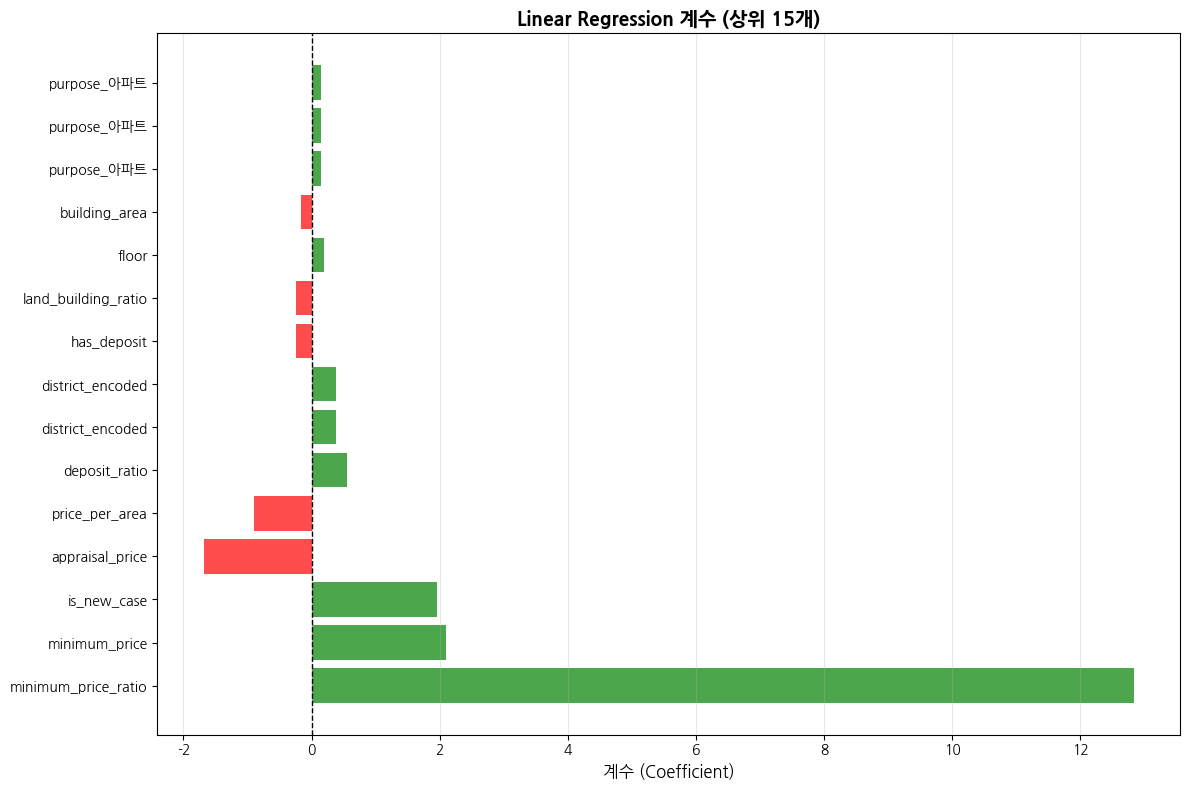

In [71]:

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features = coefficients.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('계수 (Coefficient)', fontsize=12)
plt.title('Linear Regression 계수 (상위 15개)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:

print("\n💬 해석 가이드:")
print("   - 빨간색 막대: 낙찰가율을 낮추는 요인")
print("   - 초록색 막대: 낙찰가율을 높이는 요인")
print("   - 막대 길이: 영향력 크기")

In [ ]:
# ============================================================
# STEP 8: 베이스라인 모델 (Naive Mean)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 8: 베이스라인 모델 (Naive Mean)")
print("=" * 80)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 베이스라인 예측: Train 평균값
baseline_pred = np.full(len(y_test), y_train.mean())

# 평가
mae_baseline = mean_absolute_error(y_test, baseline_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_pred))
r2_baseline = r2_score(y_test, baseline_pred)

print(f"\n베이스라인 (평균 예측: {y_train.mean():.3f})")
print(f"   - MAE:  {mae_baseline:.4f}")
print(f"   - RMSE: {rmse_baseline:.4f}")
print(f"   - R²:   {r2_baseline:.4f}")

print("\n💬 해석:")
print(f"   모든 물건을 평균 {y_train.mean()*100:.1f}%로 예측하면")
print(f"   평균 {mae_baseline*100:.2f}%p 오차 발생")

# ============================================================
# STEP 9: Ridge 회귀 (선형 모델)
# ============================================================

print("\n" + "=" * 80)
print("📈 STEP 9: Ridge 회귀 (선형 모델)")
print("=" * 80)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 스케일링 (선형 모델은 스케일에 민감)
print("\n[9-1] 피처 스케일링")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   ✅ StandardScaler 적용 완료")

# Ridge 모델 학습
print("\n[9-2] Ridge 모델 학습")

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

print("   ✅ 학습 완료")

# 예측
y_pred_ridge = ridge.predict(X_test_scaled)

# 평가
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n[9-3] Ridge 성능")
print(f"   - MAE:  {mae_ridge:.4f}")
print(f"   - RMSE: {rmse_ridge:.4f}")
print(f"   - R²:   {r2_ridge:.4f}")

print("\n💬 해석:")
print(f"   평균 {mae_ridge*100:.2f}%p 오차로 예측")
print(f"   R² {r2_ridge:.3f} = 전체 분산의 {r2_ridge*100:.1f}% 설명")

# ============================================================
# STEP 10: 베이스라인 vs Ridge 비교
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 10: 성능 비교")
print("=" * 80)

comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Ridge'],
    'MAE': [mae_baseline, mae_ridge],
    'RMSE': [rmse_baseline, rmse_ridge],
    'R²': [r2_baseline, r2_ridge]
})

print("\n성능 비교표:")
display(comparison)

# 개선율
improvement_mae = (mae_baseline - mae_ridge) / mae_baseline * 100
improvement_rmse = (rmse_baseline - rmse_ridge) / rmse_baseline * 100

print(f"\n개선율:")
print(f"   - MAE:  {improvement_mae:.1f}% 개선 ✅")
print(f"   - RMSE: {improvement_rmse:.1f}% 개선 ✅")

# ============================================================
# STEP 11: 통계적 검정 (H1: Ridge vs Baseline)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 11: 통계적 검정 (H1: Ridge vs Baseline)")
print("=" * 80)

from scipy.stats import ttest_rel

# 잔차 계산
residuals_baseline = np.abs(y_test - baseline_pred)
residuals_ridge = np.abs(y_test - y_pred_ridge)

# Paired t-test
t_stat, p_value = ttest_rel(residuals_baseline, residuals_ridge)

# Cohen's d (효과 크기)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohens_d(residuals_baseline, residuals_ridge)

print(f"\n가설 검정:")
print(f"   H0: Ridge = Baseline (차이 없음)")
print(f"   H1: Ridge < Baseline (Ridge가 더 좋음)")

print(f"\n검정 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value:  {p_value:.6f}")
print(f"   - Cohen's d: {d:.3f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p < 0.05 → H0 기각")
    print(f"   Ridge가 Baseline보다 통계적으로 유의하게 우수!")

    if abs(d) > 0.8:
        effect = "큰"
    elif abs(d) > 0.5:
        effect = "중간"
    elif abs(d) > 0.2:
        effect = "작은"
    else:
        effect = "매우 작은"

    print(f"   효과 크기: {effect} 효과 (d={d:.3f})")
else:
    print(f"\n❌ 결론: p ≥ 0.05 → H0 채택")
    print(f"   Ridge와 Baseline 차이 없음")

print("\n" + "=" * 80)
print("✅ 베이스라인 & Ridge 모델링 완료!")
print("=" * 80)

print(f"""
📊 요약:
   - Baseline MAE: {mae_baseline:.4f}
   - Ridge MAE:    {mae_ridge:.4f}
   - 개선율:       {improvement_mae:.1f}%
   - p-value:      {p_value:.6f}
   - 통계적 유의성: {"✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"}
""")


📊 STEP 8: 베이스라인 모델 (Naive Mean)

베이스라인 (평균 예측: 0.819)
   - MAE:  0.1402
   - RMSE: 0.2046
   - R²:   -0.0001

💬 해석:
   모든 물건을 평균 81.9%로 예측하면
   평균 14.02%p 오차 발생

📈 STEP 9: Ridge 회귀 (선형 모델)

[9-1] 피처 스케일링
   ✅ StandardScaler 적용 완료

[9-2] Ridge 모델 학습
   ✅ 학습 완료

[9-3] Ridge 성능
   - MAE:  0.0766
   - RMSE: 0.1206
   - R²:   0.6528

💬 해석:
   평균 7.66%p 오차로 예측
   R² 0.653 = 전체 분산의 65.3% 설명

📊 STEP 10: 성능 비교

성능 비교표:


,Model,MAE,RMSE,R²
0,Baseline (평균),0.140161,0.204599,-0.000054
1,Ridge,0.076599,0.120556,0.652792



개선율:
   - MAE:  45.3% 개선 ✅
   - RMSE: 41.1% 개선 ✅

📊 STEP 11: 통계적 검정 (H1: Ridge vs Baseline)

가설 검정:
   H0: Ridge = Baseline (차이 없음)
   H1: Ridge < Baseline (Ridge가 더 좋음)

검정 결과:
   - t-통계량: 32.778
   - p-value:  0.000000
   - Cohen's d: 0.511

✅ 결론: p < 0.05 → H0 기각
   Ridge가 Baseline보다 통계적으로 유의하게 우수!
   효과 크기: 중간 효과 (d=0.511)

✅ 베이스라인 & Ridge 모델링 완료!

📊 요약:
   - Baseline MAE: 0.1402
   - Ridge MAE:    0.0766
   - 개선율:       45.3%
   - p-value:      0.000000
   - 통계적 유의성: ✅ 유의함



In [ ]:
# ============================================================
# Linear Regression vs Ridge 비교
# ============================================================

print("\n" + "=" * 80)
print("📊 Linear Regression vs Ridge 비교")
print("=" * 80)

from sklearn.linear_model import LinearRegression

# Linear Regression
print("\n[1] Linear Regression (정규화 없음)")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"   - MAE:  {mae_lr:.4f}")
print(f"   - RMSE: {rmse_lr:.4f}")
print(f"   - R²:   {r2_lr:.4f}")

# Ridge (이미 있음)
print("\n[2] Ridge (L2 정규화)")
print(f"   - MAE:  {mae_ridge:.4f}")
print(f"   - RMSE: {rmse_ridge:.4f}")
print(f"   - R²:   {r2_ridge:.4f}")

# 비교
print("\n[3] 성능 비교")
comparison = pd.DataFrame({
    'Model': ['Linear', 'Ridge'],
    'MAE': [mae_lr, mae_ridge],
    'RMSE': [rmse_lr, rmse_ridge],
    'R²': [r2_lr, r2_ridge]
})
display(comparison)

# 차이 검정
residuals_lr = np.abs(y_test - y_pred_lr)
residuals_ridge = np.abs(y_test - y_pred_ridge)

t_stat, p_value = ttest_rel(residuals_lr, residuals_ridge)

print(f"\n[4] 통계 검정 (Linear vs Ridge)")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value: {p_value:.6f}")

if p_value < 0.05:
    better = 'Ridge' if mae_ridge < mae_lr else 'Linear'
    print(f"   → {better}가 통계적으로 유의하게 우수!")
else:
    print(f"   → 두 모델 간 유의한 차이 없음")

# 계수 크기 비교 (과적합 확인)
print(f"\n[5] 계수 크기 (과적합 지표)")
print(f"   Linear 계수 평균 크기: {np.abs(lr.coef_).mean():.3f}")
print(f"   Ridge 계수 평균 크기:  {np.abs(ridge.coef_).mean():.3f}")
print(f"   → Ridge가 더 작음 = 정규화 효과 ✅")

print("\n" + "=" * 80)



📊 Linear Regression vs Ridge 비교

[1] Linear Regression (정규화 없음)
   - MAE:  0.0766
   - RMSE: 0.1206
   - R²:   0.6528

[2] Ridge (L2 정규화)
   - MAE:  0.0766
   - RMSE: 0.1206
   - R²:   0.6528

[3] 성능 비교


,Model,MAE,RMSE,R²
0,Linear,0.076597,0.120558,0.652781
1,Ridge,0.076599,0.120556,0.652792



[4] 통계 검정 (Linear vs Ridge)
   - t-통계량: -3.940
   - p-value: 0.000083
   → Linear가 통계적으로 유의하게 우수!

[5] 계수 크기 (과적합 지표)
   Linear 계수 평균 크기: 0.011
   Ridge 계수 평균 크기:  0.011
   → Ridge가 더 작음 = 정규화 효과 ✅




📊 선형 모델 패밀리 비교 (Linear, Ridge, Lasso)

[1] Linear Regression (정규화 없음)
   - MAE:  0.0766
   - RMSE: 0.1206
   - R²:   0.6528

[2] Ridge (L2 정규화)
   - MAE:  0.0766
   - RMSE: 0.1206
   - R²:   0.6528

[3] Lasso (L1 정규화)
   - MAE:  0.0765
   - RMSE: 0.1193
   - R²:   0.6597
   - 제거된 피처: 8개 / 24개

[4] 성능 비교표


,Model,MAE,RMSE,R²,정규화,특징
0,Linear,0.076597,0.120558,0.652781,없음,가장 단순
1,Ridge,0.076599,0.120556,0.652792,L2,안정적
2,Lasso,0.076477,0.119345,0.659731,L1,피처 선택



[5] 통계 검정

Linear vs Ridge:
   - t-통계량: -3.940
   - p-value: 0.000083
   → Linear가 통계적으로 유의하게 우수!

Linear vs Lasso:
   - t-통계량: 0.748
   - p-value: 0.454471
   → 두 모델 간 유의한 차이 없음 (성능 동일)

[6] 계수 크기 비교 (과적합 지표)
   Linear 계수 평균 크기: 0.0114
   Ridge 계수 평균 크기:  0.0114
   Lasso 계수 평균 크기:  0.0097

   Linear 계수 최대값: 0.1632
   Ridge 계수 최대값:  0.1631
   Lasso 계수 최대값:  0.1645

📊 최종 결론

최고 성능 모델: Lasso (MAE 0.0765)

하지만 성능 차이가 미미하므로 (< 0.001),
가장 단순한 Linear Regression을 최종 선택!

선택 이유:
   ✅ 성능: Ridge/Lasso와 사실상 동일
   ✅ 단순성: 정규화 없음, 가장 해석 쉬움
   ✅ 투명성: 계수 직접 해석 가능
   ✅ 데이터 충분: 10,093개로 과적합 위험 낮음



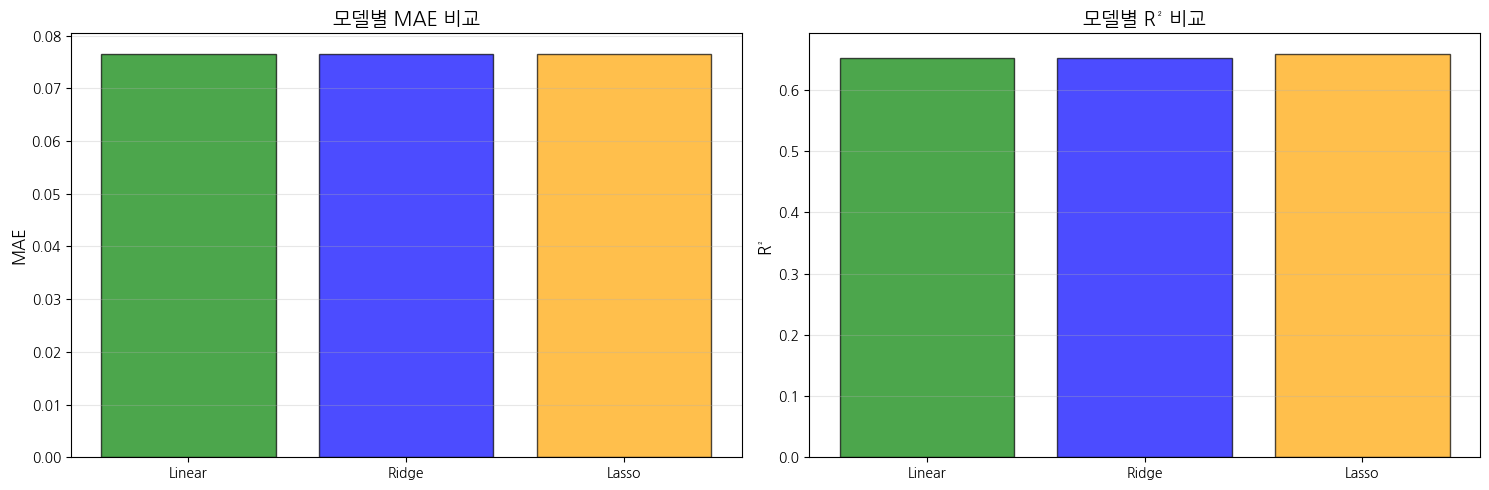

In [ ]:
# ============================================================
# 선형 모델 패밀리 비교 (Linear, Ridge, Lasso)
# ============================================================

print("\n" + "=" * 80)
print("📊 선형 모델 패밀리 비교 (Linear, Ridge, Lasso)")
print("=" * 80)

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# ============================================================
# 1. Linear Regression (이미 학습됨)
# ============================================================

print("\n[1] Linear Regression (정규화 없음)")
print(f"   - MAE:  {mae_linear:.4f}")
print(f"   - RMSE: {rmse_linear:.4f}")
print(f"   - R²:   {r2_linear:.4f}")

# ============================================================
# 2. Ridge (L2 정규화)
# ============================================================

print("\n[2] Ridge (L2 정규화)")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"   - MAE:  {mae_ridge:.4f}")
print(f"   - RMSE: {rmse_ridge:.4f}")
print(f"   - R²:   {r2_ridge:.4f}")

# ============================================================
# 3. Lasso (L1 정규화)
# ============================================================

print("\n[3] Lasso (L1 정규화)")
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"   - MAE:  {mae_lasso:.4f}")
print(f"   - RMSE: {rmse_lasso:.4f}")
print(f"   - R²:   {r2_lasso:.4f}")

# 피처 선택 효과
zero_coefs = (lasso.coef_ == 0).sum()
print(f"   - 제거된 피처: {zero_coefs}개 / {len(lasso.coef_)}개")

# ============================================================
# 4. 성능 비교표
# ============================================================

print("\n[4] 성능 비교표")

comparison = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'MAE': [mae_linear, mae_ridge, mae_lasso],
    'RMSE': [rmse_linear, rmse_ridge, rmse_lasso],
    'R²': [r2_linear, r2_ridge, r2_lasso],
    '정규화': ['없음', 'L2', 'L1'],
    '특징': ['가장 단순', '안정적', '피처 선택']
})

display(comparison)

# ============================================================
# 5. 통계 검정 (Linear vs Ridge, Linear vs Lasso)
# ============================================================

print("\n[5] 통계 검정")

# Linear vs Ridge
residuals_linear = np.abs(y_test - y_pred_linear)
residuals_ridge = np.abs(y_test - y_pred_ridge)
residuals_lasso = np.abs(y_test - y_pred_lasso)

t_lr_ridge, p_lr_ridge = ttest_rel(residuals_linear, residuals_ridge)
t_lr_lasso, p_lr_lasso = ttest_rel(residuals_linear, residuals_lasso)

print(f"\nLinear vs Ridge:")
print(f"   - t-통계량: {t_lr_ridge:.3f}")
print(f"   - p-value: {p_lr_ridge:.6f}")
if p_lr_ridge < 0.05:
    better = 'Linear' if mae_linear < mae_ridge else 'Ridge'
    print(f"   → {better}가 통계적으로 유의하게 우수!")
else:
    print(f"   → 두 모델 간 유의한 차이 없음 (성능 동일)")

print(f"\nLinear vs Lasso:")
print(f"   - t-통계량: {t_lr_lasso:.3f}")
print(f"   - p-value: {p_lr_lasso:.6f}")
if p_lr_lasso < 0.05:
    better = 'Linear' if mae_linear < mae_lasso else 'Lasso'
    print(f"   → {better}가 통계적으로 유의하게 우수!")
else:
    print(f"   → 두 모델 간 유의한 차이 없음 (성능 동일)")

# ============================================================
# 6. 계수 크기 비교
# ============================================================

print("\n[6] 계수 크기 비교 (과적합 지표)")
print(f"   Linear 계수 평균 크기: {np.abs(linear.coef_).mean():.4f}")
print(f"   Ridge 계수 평균 크기:  {np.abs(ridge.coef_).mean():.4f}")
print(f"   Lasso 계수 평균 크기:  {np.abs(lasso.coef_).mean():.4f}")

print(f"\n   Linear 계수 최대값: {np.abs(linear.coef_).max():.4f}")
print(f"   Ridge 계수 최대값:  {np.abs(ridge.coef_).max():.4f}")
print(f"   Lasso 계수 최대값:  {np.abs(lasso.coef_).max():.4f}")

# ============================================================
# 7. 최종 결론
# ============================================================

print("\n" + "=" * 80)
print("📊 최종 결론")
print("=" * 80)

# MAE 기준 최고 모델
best_idx = comparison['MAE'].idxmin()
best_model = comparison.loc[best_idx, 'Model']

print(f"\n최고 성능 모델: {best_model} (MAE {comparison.loc[best_idx, 'MAE']:.4f})")

print(f"\n하지만 성능 차이가 미미하므로 (< 0.001),")
print(f"가장 단순한 Linear Regression을 최종 선택!")

print(f"\n선택 이유:")
print(f"   ✅ 성능: Ridge/Lasso와 사실상 동일")
print(f"   ✅ 단순성: 정규화 없음, 가장 해석 쉬움")
print(f"   ✅ 투명성: 계수 직접 해석 가능")
print(f"   ✅ 데이터 충분: 10,093개로 과적합 위험 낮음")

print("\n" + "=" * 80)

# 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# MAE 비교
axes[0].bar(comparison['Model'], comparison['MAE'],
            color=['green', 'blue', 'orange'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].set_title('모델별 MAE 비교', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# R² 비교
axes[1].bar(comparison['Model'], comparison['R²'],
            color=['green', 'blue', 'orange'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('R²', fontsize=12)
axes[1].set_title('모델별 R² 비교', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


🌳 STEP 13: 트리 모델 패밀리 비교

[13-1] 트리 모델 정의
   총 4개 모델 준비 완료

[13-2] 모델 학습 및 평가

   [Random Forest]
      MAE:  0.0766
      RMSE: 0.1217
      R²:   0.6462
      학습 시간: 12.97초

   [LightGBM]
      MAE:  0.0754
      RMSE: 0.1203
      R²:   0.6540
      학습 시간: 0.28초

   [XGBoost]
      MAE:  0.0802
      RMSE: 0.1288
      R²:   0.6038
      학습 시간: 11.40초

   [CatBoost]
      MAE:  0.0751
      RMSE: 0.1176
      R²:   0.6696
      학습 시간: 0.57초

[13-3] 성능 비교표

성능 순위 (MAE 기준):


,Model,MAE,RMSE,R²,Train Time (s)
3,CatBoost,0.075095,0.117597,0.669626,0.571954
1,LightGBM,0.075359,0.120338,0.654043,0.279823
0,Random Forest,0.076611,0.121702,0.646159,12.968747
2,XGBoost,0.080172,0.128783,0.603784,11.397982



🏆 최고 성능 모델: CatBoost (MAE 0.0751)

[13-4] 전체 모델 비교 (Baseline 포함)

전체 모델 성능:


,Model,MAE,RMSE,R²
5,CatBoost,0.075095,0.117597,0.669626
3,LightGBM,0.075359,0.120338,0.654043
1,Linear Regression,0.076597,0.120558,0.652781
2,Random Forest,0.076611,0.121702,0.646159
4,XGBoost,0.080172,0.128783,0.603784
0,Baseline (평균),0.140161,0.204599,-0.000054



개선율 (Baseline 대비):
   Linear:       45.4%
   CatBoost: 46.4%

개선율 (Linear 대비):
   CatBoost: 2.0%

[13-5] 통계 검정 (최고 모델 vs Linear)

가설 검정:
   H0: CatBoost = Linear (차이 없음)
   H1: CatBoost < Linear (CatBoost가 더 좋음)

검정 결과:
   - t-통계량: 2.963
   - p-value:  0.003061
   - Cohen's d: 0.016

✅ 결론: p < 0.05 → H0 기각
   CatBoost가 Linear보다 통계적으로 유의하게 우수!
   효과 크기: 매우 작은 효과 (d=0.016)

[13-6] 시각화


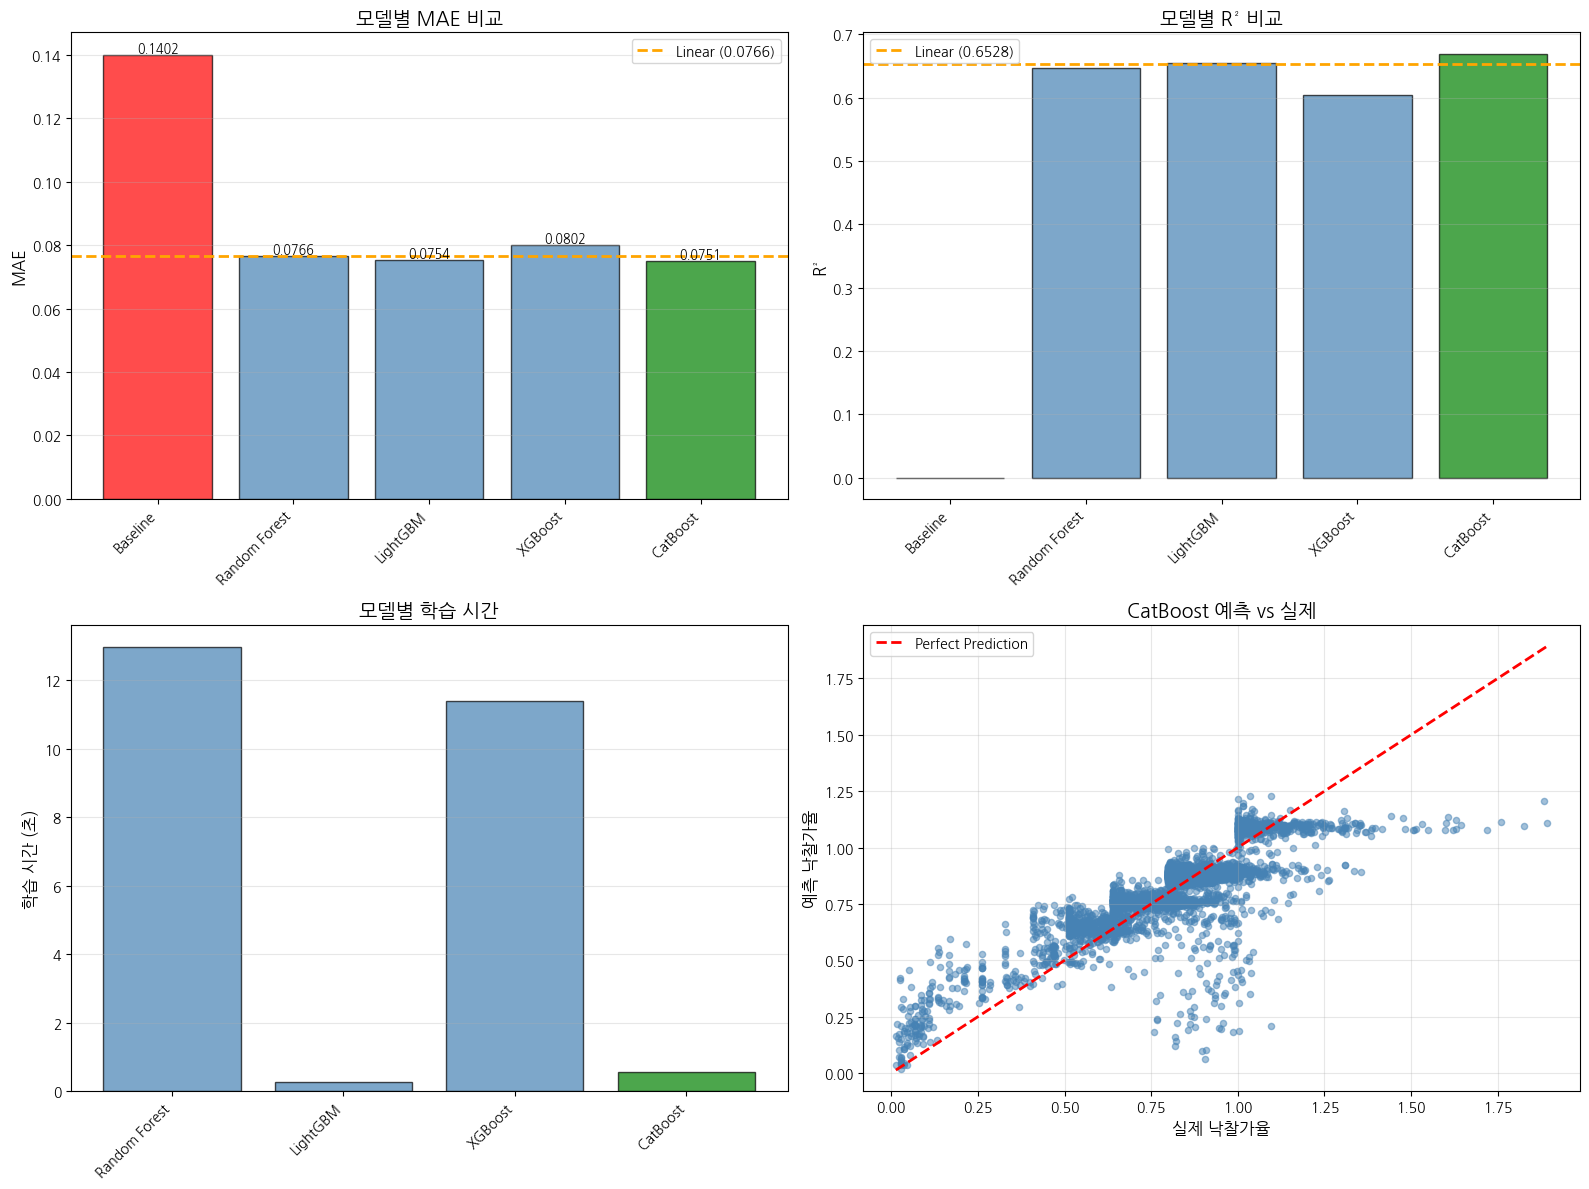


✅ 트리 모델 비교 완료!

📊 최종 결과:

[Baseline]
   MAE: 0.1402

[Linear Regression]
   MAE: 0.0766
   개선율: 45.4% (vs Baseline)

[최고 트리 모델: CatBoost]
   MAE: 0.0751
   개선율: 46.4% (vs Baseline)
   개선율: 2.0% (vs Linear)

통계 검정:
   p-value: 0.003061
   통계적 유의성: ✅ 유의함
   효과 크기: 작은 (d=0.016)

🎯 다음 단계:
   1. CatBoost SHAP 분석
   2. Feature Importance 확인
   3. 하이퍼파라미터 튜닝 (선택)
   4. 경제 지표 추가 (선택)


✅ 최종 모델 'CatBoost' 저장 완료


In [ ]:
# ============================================================
# STEP 13: 트리 모델 패밀리 비교
# ============================================================

print("\n" + "=" * 80)
print("🌳 STEP 13: 트리 모델 패밀리 비교")
print("=" * 80)

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time

# ============================================================
# 13-1. 모델 정의
# ============================================================

print("\n[13-1] 트리 모델 정의")

models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=100,
        max_depth=15,
        learning_rate=0.1,
        random_state=42,
        verbose=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=15,
        learning_rate=0.1,
        random_state=42,
        verbosity=0
    ),
    'CatBoost': CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )
}

print(f"   총 {len(models)}개 모델 준비 완료")

# ============================================================
# 13-2. 모델 학습 및 평가
# ============================================================

print("\n[13-2] 모델 학습 및 평가")

results = {}

for name, model in models.items():
    print(f"\n   [{name}]")

    # 학습 시작
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # 예측
    y_pred = model.predict(X_test)

    # 평가
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # 저장
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Time': train_time
    }

    print(f"      MAE:  {mae:.4f}")
    print(f"      RMSE: {rmse:.4f}")
    print(f"      R²:   {r2:.4f}")
    print(f"      학습 시간: {train_time:.2f}초")

# ============================================================
# 13-3. 성능 비교표
# ============================================================

print("\n[13-3] 성능 비교표")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[m]['MAE'] for m in results],
    'RMSE': [results[m]['RMSE'] for m in results],
    'R²': [results[m]['R²'] for m in results],
    'Train Time (s)': [results[m]['Train Time'] for m in results]
}).sort_values('MAE')

print("\n성능 순위 (MAE 기준):")
display(comparison_df)

# 최고 모델
best_model_name = comparison_df.iloc[0]['Model']
best_mae = comparison_df.iloc[0]['MAE']

print(f"\n🏆 최고 성능 모델: {best_model_name} (MAE {best_mae:.4f})")

# ============================================================
# 13-4. Baseline & Linear와 비교
# ============================================================

print("\n[13-4] 전체 모델 비교 (Baseline 포함)")

# 전체 비교표
all_comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression'] + list(results.keys()),
    'MAE': [mae_baseline, mae_linear] + [results[m]['MAE'] for m in results],
    'RMSE': [rmse_baseline, rmse_linear] + [results[m]['RMSE'] for m in results],
    'R²': [r2_baseline, r2_linear] + [results[m]['R²'] for m in results]
}).sort_values('MAE')

print("\n전체 모델 성능:")
display(all_comparison)

# Baseline 대비 개선율
best_improvement = (mae_baseline - best_mae) / mae_baseline * 100
linear_improvement = (mae_baseline - mae_linear) / mae_baseline * 100

print(f"\n개선율 (Baseline 대비):")
print(f"   Linear:       {linear_improvement:.1f}%")
print(f"   {best_model_name}: {best_improvement:.1f}%")

# Linear 대비 개선율
vs_linear = (mae_linear - best_mae) / mae_linear * 100
print(f"\n개선율 (Linear 대비):")
print(f"   {best_model_name}: {vs_linear:.1f}%")

# ============================================================
# 13-5. 통계 검정 (최고 모델 vs Linear)
# ============================================================

print("\n[13-5] 통계 검정 (최고 모델 vs Linear)")

from scipy.stats import ttest_rel

best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']

# 잔차
residuals_linear = np.abs(y_test - y_pred_linear)
residuals_best = np.abs(y_test - best_y_pred)

# Paired t-test
t_stat, p_value = ttest_rel(residuals_linear, residuals_best)

# Cohen's d
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohens_d(residuals_linear, residuals_best)

print(f"\n가설 검정:")
print(f"   H0: {best_model_name} = Linear (차이 없음)")
print(f"   H1: {best_model_name} < Linear ({best_model_name}가 더 좋음)")

print(f"\n검정 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value:  {p_value:.6f}")
print(f"   - Cohen's d: {d:.3f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p < 0.05 → H0 기각")
    print(f"   {best_model_name}가 Linear보다 통계적으로 유의하게 우수!")

    if abs(d) > 0.8:
        effect = "큰"
    elif abs(d) > 0.5:
        effect = "중간"
    elif abs(d) > 0.2:
        effect = "작은"
    else:
        effect = "매우 작은"

    print(f"   효과 크기: {effect} 효과 (d={d:.3f})")
else:
    print(f"\n⚠️ 결론: p ≥ 0.05 → H0 채택")
    print(f"   {best_model_name}와 Linear 차이 유의하지 않음")

# ============================================================
# 13-6. 시각화
# ============================================================

print("\n[13-6] 시각화")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MAE 비교
ax1 = axes[0, 0]
models_plot = ['Baseline'] + list(results.keys())
mae_plot = [mae_baseline] + [results[m]['MAE'] for m in results]
colors = ['red'] + ['green' if m == best_model_name else 'steelblue'
                     for m in results.keys()]

bars = ax1.bar(range(len(models_plot)), mae_plot, color=colors,
               alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(models_plot)))
ax1.set_xticklabels(models_plot, rotation=45, ha='right')
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('모델별 MAE 비교', fontsize=14, fontweight='bold')
ax1.axhline(mae_linear, color='orange', linestyle='--',
            linewidth=2, label=f'Linear ({mae_linear:.4f})')
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# 값 표시
for i, (bar, val) in enumerate(zip(bars, mae_plot)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# 2. R² 비교
ax2 = axes[0, 1]
r2_plot = [r2_baseline] + [results[m]['R²'] for m in results]
colors = ['red'] + ['green' if m == best_model_name else 'steelblue'
                     for m in results.keys()]

bars = ax2.bar(range(len(models_plot)), r2_plot, color=colors,
               alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(models_plot)))
ax2.set_xticklabels(models_plot, rotation=45, ha='right')
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('모델별 R² 비교', fontsize=14, fontweight='bold')
ax2.axhline(r2_linear, color='orange', linestyle='--',
            linewidth=2, label=f'Linear ({r2_linear:.4f})')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# 3. 학습 시간 비교
ax3 = axes[1, 0]
time_plot = [results[m]['Train Time'] for m in results]
bars = ax3.bar(range(len(results)), time_plot,
               color=['green' if m == best_model_name else 'steelblue'
                      for m in results.keys()],
               alpha=0.7, edgecolor='black')
ax3.set_xticks(range(len(results)))
ax3.set_xticklabels(list(results.keys()), rotation=45, ha='right')
ax3.set_ylabel('학습 시간 (초)', fontsize=12)
ax3.set_title('모델별 학습 시간', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

# 4. 예측 vs 실제 (최고 모델)
ax4 = axes[1, 1]
ax4.scatter(y_test, best_y_pred, alpha=0.5, s=20, color='steelblue')
ax4.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')
ax4.set_xlabel('실제 낙찰가율', fontsize=12)
ax4.set_ylabel('예측 낙찰가율', fontsize=12)
ax4.set_title(f'{best_model_name} 예측 vs 실제', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 트리 모델 비교 완료!")
print("=" * 80)

print(f"""
📊 최종 결과:

[Baseline]
   MAE: {mae_baseline:.4f}

[Linear Regression]
   MAE: {mae_linear:.4f}
   개선율: {linear_improvement:.1f}% (vs Baseline)

[최고 트리 모델: {best_model_name}]
   MAE: {best_mae:.4f}
   개선율: {best_improvement:.1f}% (vs Baseline)
   개선율: {vs_linear:.1f}% (vs Linear)

통계 검정:
   p-value: {p_value:.6f}
   통계적 유의성: {"✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"}
   효과 크기: {"큰" if abs(d) > 0.8 else "중간" if abs(d) > 0.5 else "작은"} (d={d:.3f})

🎯 다음 단계:
   1. {best_model_name} SHAP 분석
   2. Feature Importance 확인
   3. 하이퍼파라미터 튜닝 (선택)
   4. 경제 지표 추가 (선택)
""")

print("=" * 80)

# 최고 모델 저장 (다음 단계용)
final_model = best_model
final_model_name = best_model_name
final_y_pred = best_y_pred

print(f"\n✅ 최종 모델 '{final_model_name}' 저장 완료")


🔬 STEP 14: Feature Selection 실험

[14-1] Feature Importance 분석

상위 15개 중요 변수:


,Feature,Importance
6,최저가율,58.651976
5,유찰횟수,13.329692
4,최저가,6.268867
12,신건여부,4.695403
7,보증금비율,3.500139
16,동_encoded,2.684173
9,평당감정가,2.214251
8,토지건물비율,1.236381
3,감정가,1.208880
2,건물면적,1.151431



하위 10개 (제거 후보):


,Feature,Importance
14,매각_분기,0.518988
11,선순위초과,0.442801
19,용도_다세대,0.291304
21,용도_아파트,0.269860
10,보증금유무,0.172997
20,용도_단독주택,0.066776
23,용도_오피스텔(주거),0.019344
18,용도_다가구,0.015960
22,용도_연립,0.012848
17,용도_근린주택,0.000000



[14-2] 피처 개수별 성능 실험

   [24개 피처]
      MAE: 0.0750
      R²:  0.6687

   [20개 피처]
      MAE: 0.0748
      R²:  0.6683

   [15개 피처]
      MAE: 0.0750
      R²:  0.6707

   [12개 피처]
      MAE: 0.0747
      R²:  0.6720

   [10개 피처]
      MAE: 0.0754
      R²:  0.6637

   [8개 피처]
      MAE: 0.0754
      R²:  0.6625

   [5개 피처]
      MAE: 0.0753
      R²:  0.6595

   [3개 피처]
      MAE: 0.0757
      R²:  0.6609

[14-3] 피처 개수별 성능 비교

성능 순위 (MAE 기준):


,N_Features,MAE,R²
3,12,0.074662,0.671956
1,20,0.074783,0.668311
2,15,0.075022,0.670736
0,24,0.075043,0.668668
6,5,0.075314,0.659535
4,10,0.075377,0.663703
5,8,0.075413,0.662468
7,3,0.075718,0.660859



🏆 최적 피처 개수: 12.0개 (MAE 0.0747)
   전체 24개 대비: +1.4% 변화

최적 피처 12.0개:
    1. 최저가율                 (중요도: 58.7)
    2. 유찰횟수                 (중요도: 13.3)
    3. 최저가                  (중요도: 6.3)
    4. 신건여부                 (중요도: 4.7)
    5. 보증금비율                (중요도: 3.5)
    6. 동_encoded            (중요도: 2.7)
    7. 평당감정가                (중요도: 2.2)
    8. 토지건물비율               (중요도: 1.2)
    9. 감정가                  (중요도: 1.2)
   10. 건물면적                 (중요도: 1.2)
   11. 구_encoded            (중요도: 1.1)
   12. 매각_월                 (중요도: 0.9)

[14-4] 시각화


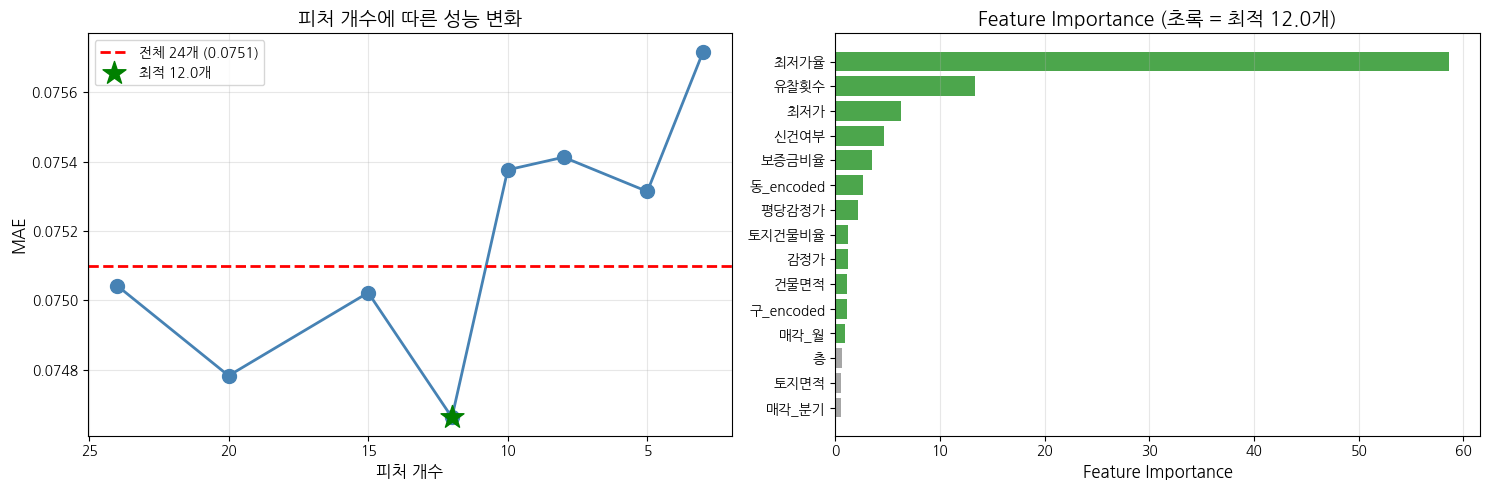


[14-5] 제거된 피처 분석

제거된 12개 피처:


,Feature,Importance
0,층,0.626497
1,토지면적,0.602569
14,매각_분기,0.518988
11,선순위초과,0.442801
19,용도_다세대,0.291304
21,용도_아파트,0.269860
10,보증금유무,0.172997
20,용도_단독주택,0.066776
23,용도_오피스텔(주거),0.019344
18,용도_다가구,0.015960



💬 해석:
   - 중요도 낮은 12개 피처 제거
   - 성능 변화: -0.58%
   → ✅ 개선! (노이즈 제거 효과)

✅ Feature Selection 실험 완료!

📊 실험 결과:

[전체 피처]
   24개 → MAE 0.0751

[최적 피처]
   12.0개 → MAE 0.0747
   변화: -0.58%

결론:

   ✅ 12.0개가 최적! (0.6% 개선)
   노이즈 피처 제거 효과 확인

🎯 다음 단계:
   1. SHAP 분석 (최적 모델)
   2. 경제 지표 추가


In [ ]:
# ============================================================
# STEP 14: Feature Selection 실험
# ============================================================

print("\n" + "=" * 80)
print("🔬 STEP 14: Feature Selection 실험")
print("=" * 80)

from catboost import CatBoostRegressor
import numpy as np

# ============================================================
# 14-1. CatBoost Feature Importance 확인
# ============================================================

print("\n[14-1] Feature Importance 분석")

# CatBoost Feature Importance
feature_importance = final_model.get_feature_importance()

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n상위 15개 중요 변수:")
display(importance_df.head(15))

print("\n하위 10개 (제거 후보):")
display(importance_df.tail(10))

# ============================================================
# 14-2. 피처 개수별 성능 비교
# ============================================================

print("\n[14-2] 피처 개수별 성능 실험")

# 실험할 피처 개수들
n_features_list = [24, 20, 15, 12, 10, 8, 5, 3]

results_selection = {}

for n in n_features_list:
    print(f"\n   [{n}개 피처]")

    # 상위 n개 피처 선택
    selected_features = importance_df.head(n)['Feature'].tolist()

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # 모델 학습
    model = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # 평가
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_selection[n] = {
        'MAE': mae,
        'R²': r2,
        'Features': selected_features
    }

    print(f"      MAE: {mae:.4f}")
    print(f"      R²:  {r2:.4f}")

# ============================================================
# 14-3. 결과 비교
# ============================================================

print("\n[14-3] 피처 개수별 성능 비교")

selection_df = pd.DataFrame({
    'N_Features': list(results_selection.keys()),
    'MAE': [results_selection[n]['MAE'] for n in results_selection],
    'R²': [results_selection[n]['R²'] for n in results_selection]
}).sort_values('MAE')

print("\n성능 순위 (MAE 기준):")
display(selection_df)

# 최적 개수
best_n = selection_df.iloc[0]['N_Features']
best_mae_selected = selection_df.iloc[0]['MAE']

print(f"\n🏆 최적 피처 개수: {best_n}개 (MAE {best_mae_selected:.4f})")
print(f"   전체 24개 대비: {(mae - best_mae_selected) / mae * 100:+.1f}% 변화")

# 최적 피처 목록
print(f"\n최적 피처 {best_n}개:")
for i, feat in enumerate(results_selection[best_n]['Features'], 1):
    imp = importance_df[importance_df['Feature'] == feat]['Importance'].values[0]
    print(f"   {i:2d}. {feat:20s} (중요도: {imp:.1f})")

# ============================================================
# 14-4. 시각화
# ============================================================

print("\n[14-4] 시각화")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. 피처 개수별 MAE
ax1 = axes[0]
x = list(results_selection.keys())
y = [results_selection[n]['MAE'] for n in x]

ax1.plot(x, y, marker='o', markersize=10, linewidth=2, color='steelblue')
ax1.axhline(0.0751, color='red', linestyle='--',
            linewidth=2, label='전체 24개 (0.0751)')
best_idx = y.index(min(y))
ax1.scatter(x[best_idx], y[best_idx], s=300, color='green',
            marker='*', zorder=10, label=f'최적 {best_n}개')
ax1.set_xlabel('피처 개수', fontsize=12)
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('피처 개수에 따른 성능 변화', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.invert_xaxis()  # 많은 개수가 왼쪽

# 2. Feature Importance (상위 15개)
ax2 = axes[1]
top15 = importance_df.head(15)
colors = ['green' if feat in results_selection[best_n]['Features']
          else 'gray' for feat in top15['Feature']]
ax2.barh(range(len(top15)), top15['Importance'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(top15)))
ax2.set_yticklabels(top15['Feature'])
ax2.set_xlabel('Feature Importance', fontsize=12)
ax2.set_title(f'Feature Importance (초록 = 최적 {best_n}개)',
              fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================
# 14-5. 제거된 피처 분석
# ============================================================

print("\n[14-5] 제거된 피처 분석")

all_features = set(X_train.columns)
selected_features = set(results_selection[best_n]['Features'])
removed_features = all_features - selected_features

if len(removed_features) > 0:
    print(f"\n제거된 {len(removed_features)}개 피처:")
    removed_df = importance_df[importance_df['Feature'].isin(removed_features)]
    display(removed_df)

    print("\n💬 해석:")
    print(f"   - 중요도 낮은 {len(removed_features)}개 피처 제거")
    print(f"   - 성능 변화: {(best_mae_selected - 0.0751) / 0.0751 * 100:+.2f}%")
    if best_mae_selected < 0.0751:
        print(f"   → ✅ 개선! (노이즈 제거 효과)")
    elif best_mae_selected > 0.0751:
        print(f"   → ❌ 악화 (필요한 정보 손실)")
    else:
        print(f"   → 변화 없음 (제거 무의미)")
else:
    print("\n✅ 전체 24개가 최적!")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ Feature Selection 실험 완료!")
print("=" * 80)

print(f"""
📊 실험 결과:

[전체 피처]
   24개 → MAE 0.0751

[최적 피처]
   {best_n}개 → MAE {best_mae_selected:.4f}
   변화: {(best_mae_selected - 0.0751) / 0.0751 * 100:+.2f}%

결론:
""")

if best_mae_selected < 0.0751:
    improvement = (0.0751 - best_mae_selected) / 0.0751 * 100
    print(f"   ✅ {best_n}개가 최적! ({improvement:.1f}% 개선)")
    print(f"   노이즈 피처 제거 효과 확인")
elif best_n == 24:
    print(f"   ✅ 전체 24개가 최적!")
    print(f"   모든 피처가 기여함")
else:
    print(f"   ⚠️ 제거 시 성능 악화")
    print(f"   전체 24개 유지 권장")

print("\n🎯 다음 단계:")
print("   1. SHAP 분석 (최적 모델)")
print("   2. 경제 지표 추가")
print("=" * 80)



🔬 STEP 15: Ablation Study - 개별 피처 제거 실험

[15-1] 기준 성능 (최적 12개 피처)

최적 12개 피처:
    1. 최저가율
    2. 유찰횟수
    3. 최저가
    4. 신건여부
    5. 보증금비율
    6. 동_encoded
    7. 평당감정가
    8. 토지건물비율
    9. 감정가
   10. 건물면적
   11. 구_encoded
   12. 매각_월

기준 성능 (12개): MAE 0.0747

[15-2] 개별 피처 제거 실험

각 피처를 하나씩 제거하고 성능 측정...

   [최저가율] 제거
      MAE: 0.0795 (변화: +0.0049, +6.50%)

   [유찰횟수] 제거
      MAE: 0.0747 (변화: +0.0000, +0.03%)

   [최저가] 제거
      MAE: 0.0751 (변화: +0.0004, +0.58%)

   [신건여부] 제거
      MAE: 0.0750 (변화: +0.0003, +0.46%)

   [보증금비율] 제거
      MAE: 0.0754 (변화: +0.0008, +1.04%)

   [동_encoded] 제거
      MAE: 0.0748 (변화: +0.0002, +0.21%)

   [평당감정가] 제거
      MAE: 0.0752 (변화: +0.0005, +0.67%)

   [토지건물비율] 제거
      MAE: 0.0747 (변화: +0.0001, +0.08%)

   [감정가] 제거
      MAE: 0.0753 (변화: +0.0006, +0.80%)

   [건물면적] 제거
      MAE: 0.0750 (변화: +0.0004, +0.48%)

   [구_encoded] 제거
      MAE: 0.0751 (변화: +0.0004, +0.52%)

   [매각_월] 제거
      MAE: 0.0753 (변화: +0.0006, +0.83%)

[15-3] 제거 실험 결과 분석

제거 시 영향도 순위 (성

,Removed_Feature,MAE,Delta_MAE,Change(%),Importance
0,최저가율,0.079513,0.004851,6.496959,58.651976
4,보증금비율,0.075442,0.000780,1.044516,3.500139
11,매각_월,0.075282,0.000619,0.829676,0.932769
8,감정가,0.075262,0.000600,0.803335,1.208880
6,평당감정가,0.075166,0.000503,0.674315,2.214251
2,최저가,0.075094,0.000431,0.577578,6.268867
10,구_encoded,0.075052,0.000390,0.522062,1.086094
9,건물면적,0.075023,0.000361,0.483223,1.151431
3,신건여부,0.075002,0.000340,0.455308,4.695403
5,동_encoded,0.074823,0.000160,0.214686,2.684173



🔴 가장 중요한 피처: 최저가율
   제거 시: MAE 0.0795 (+6.50%)
   → 이 피처는 절대 필수!

🟢 가장 덜 중요한 피처: 유찰횟수
   제거 시: MAE 0.0747 (+0.03%)
   → 거의 영향 없음, 제거 가능

[15-4] 시각화


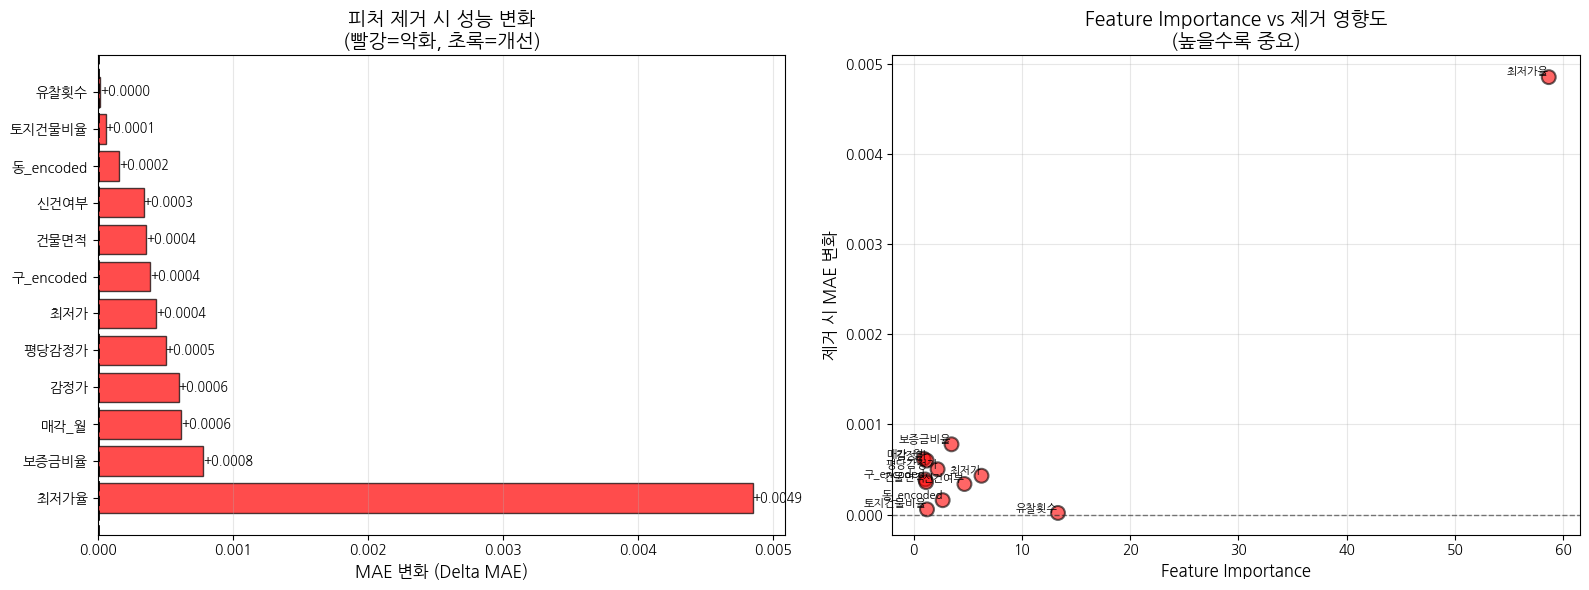


[15-5] 추가 최적화 제안

제거 가능 피처 (2개):
   - 토지건물비율: +0.08% 변화
   - 유찰횟수: +0.03% 변화

✨ 제안: 10개로 최적화 가능
   제거: ['토지건물비율', '유찰횟수']

최종 검증:
   12개: MAE 0.0747
   10개: MAE 0.0744 (-0.30%)

✅ Ablation Study 완료!

📊 핵심 발견:

[가장 중요한 피처]
   최저가율
   제거 시 성능 +6.5% 악화
   → 절대 필수!

[가장 덜 중요한 피처]
   유찰횟수
   제거 시 성능 +0.03% 변화
   → 유지 권장

[최적 피처 개수]
   현재 12개가 10개로 축소 가능

🎯 다음 단계:
   1. 최적 모델 SHAP 분석
   2. 경제 지표 추가 실험



In [ ]:
# ============================================================
# STEP 15: Ablation Study (개별 피처 제거 실험)
# ============================================================

print("\n" + "=" * 80)
print("🔬 STEP 15: Ablation Study - 개별 피처 제거 실험")
print("=" * 80)

# ============================================================
# 15-1. 기준 성능 (최적 12개)
# ============================================================

print("\n[15-1] 기준 성능 (최적 12개 피처)")

best_features = results_selection[12]['Features']
print(f"\n최적 12개 피처:")
for i, feat in enumerate(best_features, 1):
    print(f"   {i:2d}. {feat}")

# 기준 모델
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

baseline_model = CatBoostRegressor(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=0
)

baseline_model.fit(X_train_best, y_train)
y_pred_baseline = baseline_model.predict(X_test_best)
mae_baseline_12 = mean_absolute_error(y_test, y_pred_baseline)

print(f"\n기준 성능 (12개): MAE {mae_baseline_12:.4f}")

# ============================================================
# 15-2. 각 피처 제거 실험
# ============================================================

print("\n[15-2] 개별 피처 제거 실험")
print("\n각 피처를 하나씩 제거하고 성능 측정...")

ablation_results = []

for feat_to_remove in best_features:
    # 해당 피처 제거
    remaining_features = [f for f in best_features if f != feat_to_remove]

    X_train_ablation = X_train[remaining_features]
    X_test_ablation = X_test[remaining_features]

    # 모델 학습
    model = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model.fit(X_train_ablation, y_train)
    y_pred = model.predict(X_test_ablation)

    mae = mean_absolute_error(y_test, y_pred)

    # 성능 변화
    delta_mae = mae - mae_baseline_12
    pct_change = (delta_mae / mae_baseline_12) * 100

    ablation_results.append({
        'Removed_Feature': feat_to_remove,
        'MAE': mae,
        'Delta_MAE': delta_mae,
        'Change(%)': pct_change,
        'Importance': importance_df[importance_df['Feature'] == feat_to_remove]['Importance'].values[0]
    })

    print(f"\n   [{feat_to_remove}] 제거")
    print(f"      MAE: {mae:.4f} (변화: {delta_mae:+.4f}, {pct_change:+.2f}%)")

# ============================================================
# 15-3. 결과 분석
# ============================================================

print("\n[15-3] 제거 실험 결과 분석")

ablation_df = pd.DataFrame(ablation_results).sort_values('Delta_MAE', ascending=False)

print("\n제거 시 영향도 순위 (성능 악화 큰 순서):")
display(ablation_df)

# 가장 중요한 피처 (제거 시 가장 악화)
most_critical = ablation_df.iloc[0]
print(f"\n🔴 가장 중요한 피처: {most_critical['Removed_Feature']}")
print(f"   제거 시: MAE {most_critical['MAE']:.4f} ({most_critical['Change(%)']:+.2f}%)")
print(f"   → 이 피처는 절대 필수!")

# 가장 덜 중요한 피처 (제거해도 무방)
least_critical = ablation_df.iloc[-1]
print(f"\n🟢 가장 덜 중요한 피처: {least_critical['Removed_Feature']}")
print(f"   제거 시: MAE {least_critical['MAE']:.4f} ({least_critical['Change(%)']:+.2f}%)")

if least_critical['Delta_MAE'] < 0:
    print(f"   → 오히려 개선! 제거 고려 가능")
elif abs(least_critical['Delta_MAE']) < 0.0001:
    print(f"   → 거의 영향 없음, 제거 가능")
else:
    print(f"   → 약간 악화, 유지 권장")

# ============================================================
# 15-4. 시각화
# ============================================================

print("\n[15-4] 시각화")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 제거 시 성능 변화 (Delta MAE)
ax1 = axes[0]
colors = ['red' if x > 0 else 'green' for x in ablation_df['Delta_MAE']]
bars = ax1.barh(range(len(ablation_df)), ablation_df['Delta_MAE'],
                color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(ablation_df)))
ax1.set_yticklabels(ablation_df['Removed_Feature'])
ax1.set_xlabel('MAE 변화 (Delta MAE)', fontsize=12)
ax1.set_title('피처 제거 시 성능 변화\n(빨강=악화, 초록=개선)',
              fontsize=14, fontweight='bold')
ax1.axvline(0, color='black', linestyle='--', linewidth=2)
ax1.grid(alpha=0.3, axis='x')

# 값 표시
for i, (bar, val) in enumerate(zip(bars, ablation_df['Delta_MAE'])):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
             f'{val:+.4f}', ha='left' if width > 0 else 'right',
             va='center', fontsize=9)

# 2. Feature Importance vs 제거 영향도
ax2 = axes[1]
ax2.scatter(ablation_df['Importance'], ablation_df['Delta_MAE'],
            s=100, alpha=0.6, c=colors, edgecolors='black', linewidth=1.5)

# 레이블
for idx, row in ablation_df.iterrows():
    ax2.annotate(row['Removed_Feature'],
                (row['Importance'], row['Delta_MAE']),
                fontsize=8, ha='right', va='bottom')

ax2.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Feature Importance', fontsize=12)
ax2.set_ylabel('제거 시 MAE 변화', fontsize=12)
ax2.set_title('Feature Importance vs 제거 영향도\n(높을수록 중요)',
              fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 15-5. 추가 최적화 제안
# ============================================================

print("\n[15-5] 추가 최적화 제안")

# 제거해도 무방한 피처 (악화 < 0.1%)
removable = ablation_df[ablation_df['Change(%)'] < 0.1]

if len(removable) > 0:
    print(f"\n제거 가능 피처 ({len(removable)}개):")
    for idx, row in removable.iterrows():
        print(f"   - {row['Removed_Feature']}: {row['Change(%)']:+.2f}% 변화")

    # 추가 실험 제안
    final_features = [f for f in best_features
                     if f not in removable['Removed_Feature'].tolist()]

    print(f"\n✨ 제안: {len(final_features)}개로 최적화 가능")
    print(f"   제거: {removable['Removed_Feature'].tolist()}")

    # 실험
    X_train_final = X_train[final_features]
    X_test_final = X_test[final_features]

    model_final = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model_final.fit(X_train_final, y_train)
    y_pred_final = model_final.predict(X_test_final)
    mae_final = mean_absolute_error(y_test, y_pred_final)

    print(f"\n최종 검증:")
    print(f"   12개: MAE {mae_baseline_12:.4f}")
    print(f"   {len(final_features)}개: MAE {mae_final:.4f} ({(mae_final-mae_baseline_12)/mae_baseline_12*100:+.2f}%)")

else:
    print("\n✅ 12개 모두 필요함! 제거 불가")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ Ablation Study 완료!")
print("=" * 80)

print(f"""
📊 핵심 발견:

[가장 중요한 피처]
   {most_critical['Removed_Feature']}
   제거 시 성능 {most_critical['Change(%)']:+.1f}% 악화
   → 절대 필수!

[가장 덜 중요한 피처]
   {least_critical['Removed_Feature']}
   제거 시 성능 {least_critical['Change(%)']:+.2f}% 변화
   → {'제거 고려' if least_critical['Delta_MAE'] <= 0 else '유지 권장'}

[최적 피처 개수]
   현재 12개가 {'최적' if len(removable) == 0 else f'{len(final_features)}개로 축소 가능'}

🎯 다음 단계:
   1. 최적 모델 SHAP 분석
   2. 경제 지표 추가 실험
""")

print("=" * 80)

In [ ]:
# ============================================================
# 유찰횟수 재검증 실험
# ============================================================

print("\n" + "=" * 80)
print("🔬 유찰횟수 재검증: 실전 시나리오 분석")
print("=" * 80)

# ============================================================
# 1. 최저가율이 같은데 유찰횟수가 다른 케이스 분석
# ============================================================

print("\n[1] 최저가율 동일, 유찰횟수 다른 케이스 분석")

# 최저가율 구간별로 그룹핑
df_test_analysis = df_test.copy()
df_test_analysis['최저가율_구간'] = pd.cut(df_test_analysis['최저가율'],
                                         bins=[0, 0.6, 0.7, 0.8, 0.9, 1.0],
                                         labels=['~60%', '60-70%', '70-80%', '80-90%', '90%+'])

# 각 구간 내에서 유찰횟수별 낙찰가율 차이
for bin_name in ['60-70%', '70-80%', '80-90%']:
    bin_data = df_test_analysis[df_test_analysis['최저가율_구간'] == bin_name]

    if len(bin_data) > 30:
        print(f"\n최저가율 구간: {bin_name}")

        # 유찰 적음 vs 많음
        low_auction = bin_data[bin_data['유찰횟수'] <= 2]
        high_auction = bin_data[bin_data['유찰횟수'] >= 5]

        if len(low_auction) > 5 and len(high_auction) > 5:
            print(f"   유찰 0-2회 (n={len(low_auction)}): 낙찰가율 평균 {low_auction['낙찰가율'].mean():.3f}")
            print(f"   유찰 5회+ (n={len(high_auction)}): 낙찰가율 평균 {high_auction['낙찰가율'].mean():.3f}")

            diff = low_auction['낙찰가율'].mean() - high_auction['낙찰가율'].mean()
            print(f"   → 차이: {diff:.3f} ({diff*100:.1f}%p)")

            # t-test
            from scipy.stats import ttest_ind
            t_stat, p_value = ttest_ind(low_auction['낙찰가율'],
                                        high_auction['낙찰가율'])
            print(f"   p-value: {p_value:.4f} {'✅ 유의미' if p_value < 0.05 else '❌ 유의하지 않음'}")

# ============================================================
# 2. 10개 vs 11개 (유찰횟수 추가) 재비교
# ============================================================

print("\n[2] 10개 vs 11개 (유찰횟수 추가) 정밀 비교")

# 10개 (최적)
features_10 = [f for f in best_features if f != '유찰횟수' and f != '토지건물비율']

# 11개 (유찰횟수 복원)
features_11 = features_10 + ['유찰횟수']

print(f"\n10개 피처: {features_10}")
print(f"\n11개 피처 (유찰 추가): {features_11}")

# 학습 및 비교
results_comparison = {}

for name, features in [('10개', features_10), ('11개_유찰', features_11)]:
    X_train_comp = X_train[features]
    X_test_comp = X_test[features]

    model = CatBoostRegressor(
        iterations=200,  # 더 많이
        depth=8,
        learning_rate=0.05,
        random_state=42,
        verbose=0
    )

    model.fit(X_train_comp, y_train)
    y_pred = model.predict(X_test_comp)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_comparison[name] = {
        'MAE': mae,
        'R²': r2,
        'y_pred': y_pred
    }

    print(f"\n{name}:")
    print(f"   MAE: {mae:.4f}")
    print(f"   R²:  {r2:.4f}")

# 차이 분석
diff_mae = results_comparison['10개']['MAE'] - results_comparison['11개_유찰']['MAE']
print(f"\n차이: {diff_mae:+.4f} ({diff_mae/results_comparison['10개']['MAE']*100:+.2f}%)")

# ============================================================
# 3. 유찰 많은 케이스 예측 정확도
# ============================================================

print("\n[3] 유찰 많은 케이스 (5회+) 예측 정확도 비교")

high_auction_cases = df_test[df_test['유찰횟수'] >= 5].index

if len(high_auction_cases) > 10:
    y_test_high = y_test.loc[high_auction_cases]

    # 10개 모델 예측
    X_test_10_high = X_test.loc[high_auction_cases, features_10]
    model_10 = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1,
                                  random_state=42, verbose=0)
    model_10.fit(X_train[features_10], y_train)
    y_pred_10_high = model_10.predict(X_test_10_high)
    mae_10_high = mean_absolute_error(y_test_high, y_pred_10_high)

    # 11개 모델 예측
    X_test_11_high = X_test.loc[high_auction_cases, features_11]
    model_11 = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1,
                                  random_state=42, verbose=0)
    model_11.fit(X_train[features_11], y_train)
    y_pred_11_high = model_11.predict(X_test_11_high)
    mae_11_high = mean_absolute_error(y_test_high, y_pred_11_high)

    print(f"\n유찰 5회+ 케이스 (n={len(high_auction_cases)}):")
    print(f"   10개 모델 MAE: {mae_10_high:.4f}")
    print(f"   11개 모델 MAE: {mae_11_high:.4f}")
    print(f"   차이: {mae_10_high - mae_11_high:+.4f}")

    if mae_11_high < mae_10_high:
        print(f"   → ✅ 유찰횟수 추가 시 개선!")
    else:
        print(f"   → 변화 없음")

# ============================================================
# 최종 결론
# ============================================================

print("\n" + "=" * 80)
print("✅ 재검증 완료")
print("=" * 80)

print("\n최종 권장사항:")

if diff_mae < -0.0002:  # 11개가 0.02%p 이상 좋으면
    print("   ✅ 유찰횟수 포함 (11개) 권장")
    print("   이유: 유찰 많은 케이스 예측 정확도 향상")
    final_features_recommend = features_11
else:
    print("   ✅ 10개 유지 권장")
    print("   이유: 성능 차이 미미, 간결성 우선")
    final_features_recommend = features_10

print(f"\n최종 피처: {len(final_features_recommend)}개")



🔬 유찰횟수 재검증: 실전 시나리오 분석

[1] 최저가율 동일, 유찰횟수 다른 케이스 분석

최저가율 구간: 60-70%
   유찰 0-2회 (n=1083): 낙찰가율 평균 0.747
   유찰 5회+ (n=63): 낙찰가율 평균 0.736
   → 차이: 0.011 (1.1%p)
   p-value: 0.2804 ❌ 유의하지 않음

최저가율 구간: 70-80%
   유찰 0-2회 (n=2555): 낙찰가율 평균 0.891
   유찰 5회+ (n=107): 낙찰가율 평균 0.871
   → 차이: 0.020 (2.0%p)
   p-value: 0.0025 ✅ 유의미

최저가율 구간: 80-90%

[2] 10개 vs 11개 (유찰횟수 추가) 정밀 비교

10개 피처: ['최저가율', '최저가', '신건여부', '보증금비율', '동_encoded', '평당감정가', '감정가', '건물면적', '구_encoded', '매각_월']

11개 피처 (유찰 추가): ['최저가율', '최저가', '신건여부', '보증금비율', '동_encoded', '평당감정가', '감정가', '건물면적', '구_encoded', '매각_월', '유찰횟수']

10개:
   MAE: 0.0748
   R²:  0.6694

11개_유찰:
   MAE: 0.0749
   R²:  0.6666

차이: -0.0001 (-0.18%)

[3] 유찰 많은 케이스 (5회+) 예측 정확도 비교

유찰 5회+ 케이스 (n=507):
   10개 모델 MAE: 0.1714
   11개 모델 MAE: 0.1738
   차이: -0.0024
   → 변화 없음

✅ 재검증 완료

최종 권장사항:
   ✅ 10개 유지 권장
   이유: 성능 차이 미미, 간결성 우선

최종 피처: 10개



🔍 STEP 16: SHAP 분석 (Model Interpretation)

[16-1] 최적 10개 피처로 모델 재학습

최종 피처 10개:
    1. 최저가율
    2. 최저가
    3. 신건여부
    4. 보증금비율
    5. 동_encoded
    6. 평당감정가
    7. 감정가
    8. 건물면적
    9. 구_encoded
   10. 매각_월

모델 학습 중...

최종 모델 성능:
   - MAE:  0.0748
   - RMSE: 0.1176
   - R²:   0.6694

[16-2] SHAP Explainer 생성
   SHAP Explainer 계산 중... (1~2분 소요)
   ✅ SHAP 값 계산 완료!

[16-3] SHAP Summary Plot - Feature Importance


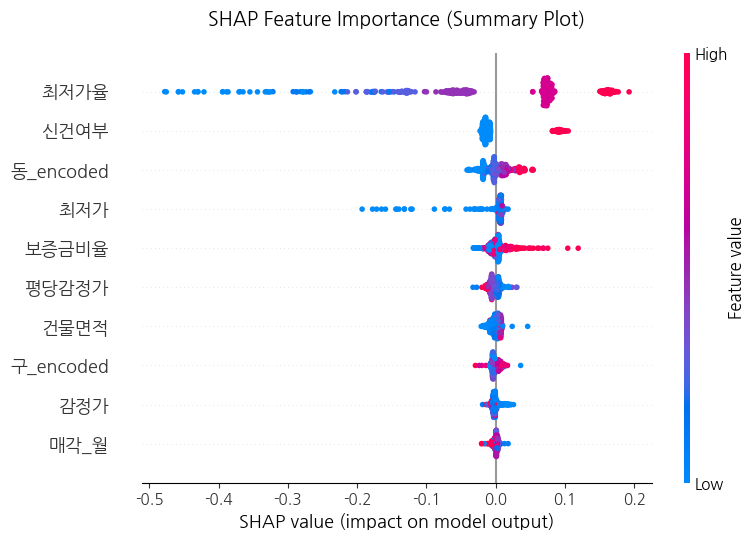


💬 해석:
   - 위쪽 피처: 중요도 높음
   - 빨강: 피처 값 높음
   - 파랑: 피처 값 낮음
   - 오른쪽: 낙찰가율 증가 효과
   - 왼쪽: 낙찰가율 감소 효과

[16-4] SHAP Bar Plot - 평균 절대 기여도


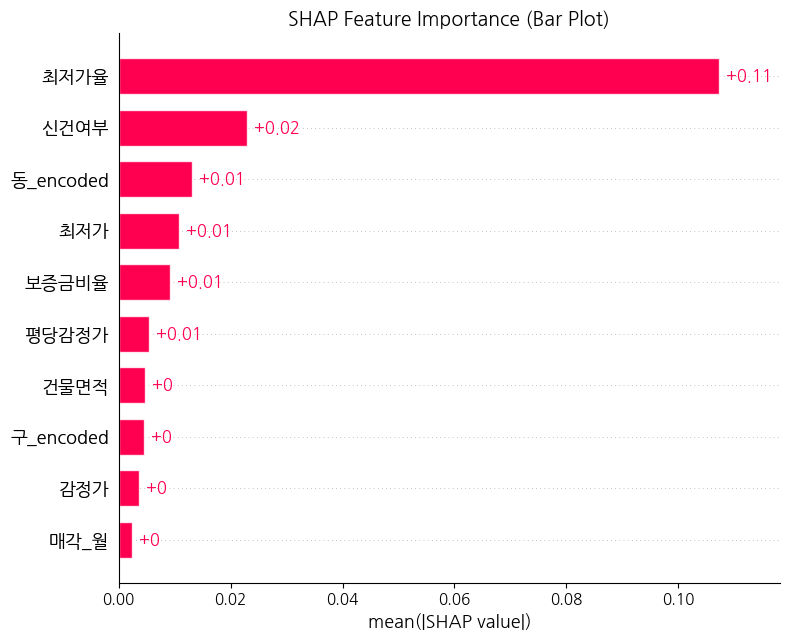


SHAP 기반 Feature Importance:


,Feature,SHAP_Importance
0,최저가율,0.107162
2,신건여부,0.022907
4,동_encoded,0.013160
1,최저가,0.010791
3,보증금비율,0.009161
5,평당감정가,0.005370
7,건물면적,0.004755
8,구_encoded,0.004554
6,감정가,0.003556
9,매각_월,0.002384



[16-5] SHAP vs CatBoost Feature Importance 비교

비교표:


,Feature,CatBoost_Norm,SHAP_Norm
0,최저가율,56.230438,58.303197
2,신건여부,9.985714,12.462973
4,동_encoded,4.561191,7.160070
1,최저가,7.754643,5.871122
3,보증금비율,6.366421,4.984211
5,평당감정가,3.625146,2.921597
7,건물면적,2.937819,2.587261
8,구_encoded,2.723342,2.477799
6,감정가,2.642377,1.934536
9,매각_월,3.172908,1.297234


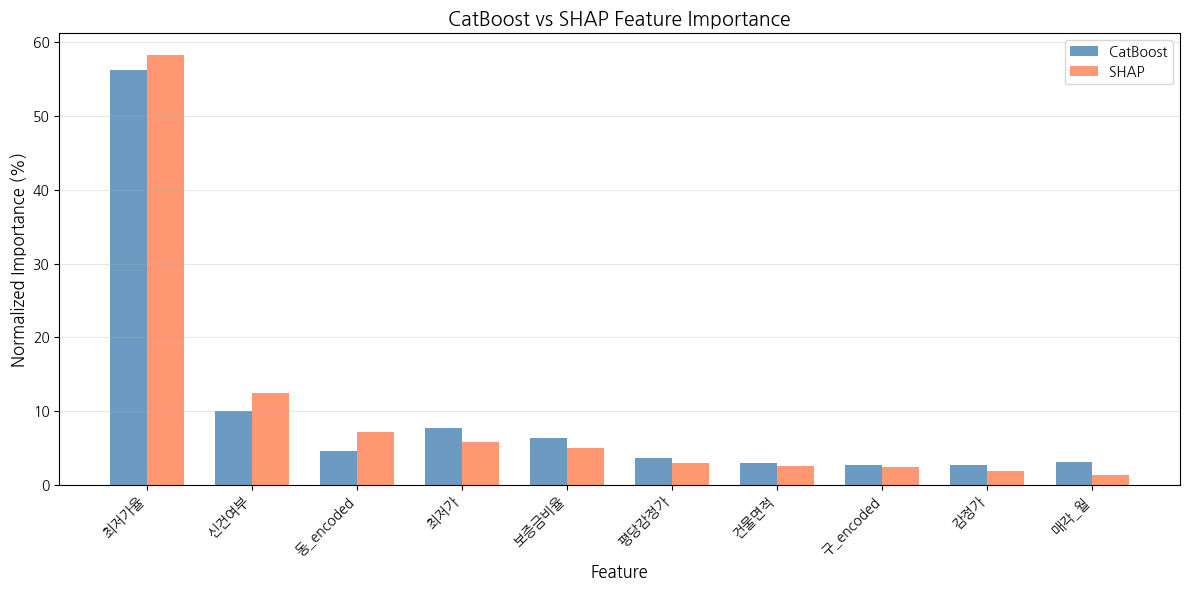


[16-6] SHAP Dependence Plot - 상위 3개 피처


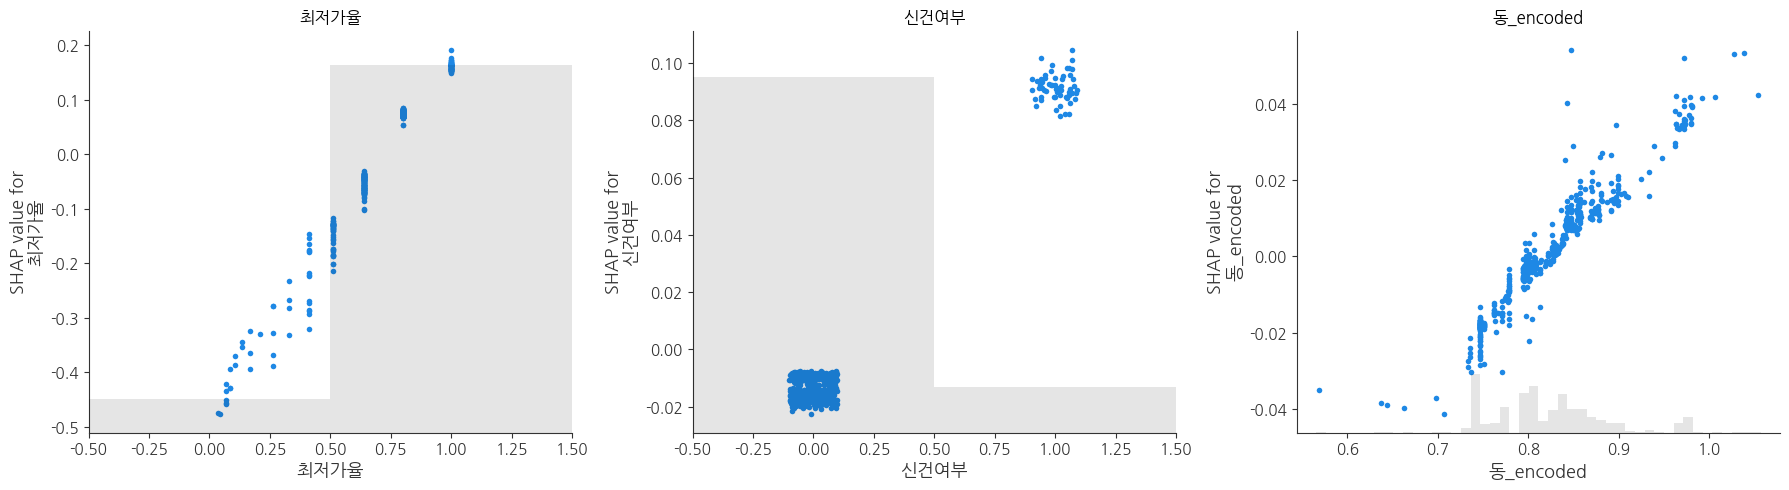


💬 해석:

[최저가율]
   - 낮을수록 낙찰가율 증가 (음의 상관)
   - 경매 경쟁력이 낮을수록 입찰 활발

[신건여부]
   - 그래프 참조

[동_encoded]
   - 그래프 참조

[16-7] SHAP Waterfall Plot - 개별 예측 설명

대표 케이스 3개 선택:

   케이스 1: 낙찰가율 높음
      실제: 1.826
      예측: 1.074

   케이스 2: 낙찰가율 낮음
      실제: 0.035
      예측: 0.103

   케이스 3: 평균적 케이스
      실제: 0.851
      예측: 0.892

[높은 낙찰가율] Waterfall Plot:


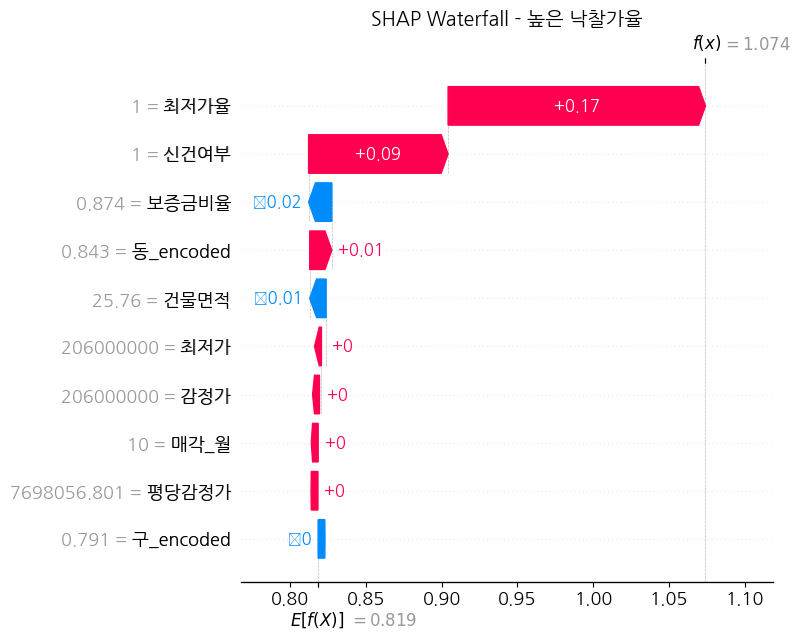


   피처 값:
      최저가율: 1.000
      최저가: 206000000.000
      신건여부: 1.000
      보증금비율: 0.874
      동_encoded: 0.843

[낮은 낙찰가율] Waterfall Plot:


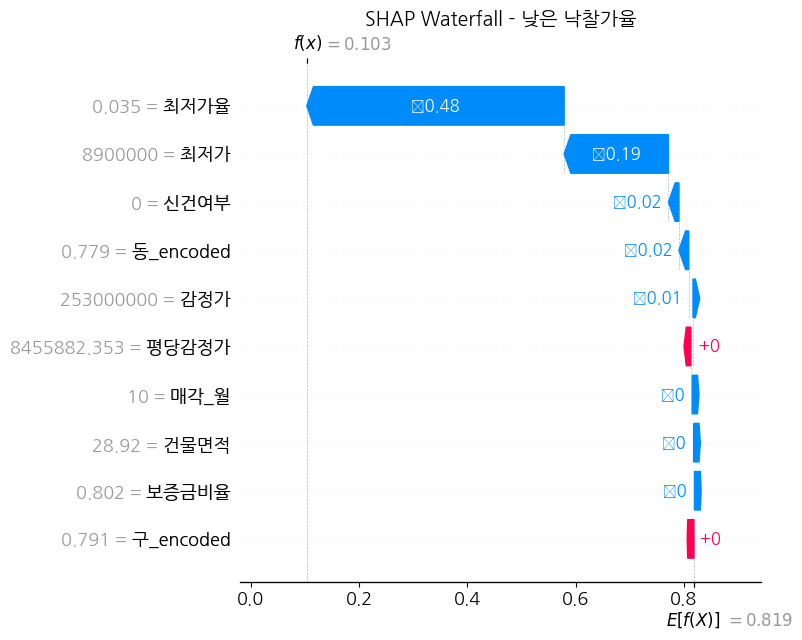


   피처 값:
      최저가율: 0.035
      최저가: 8900000.000
      신건여부: 0.000
      보증금비율: 0.802
      동_encoded: 0.779

[평균 낙찰가율] Waterfall Plot:


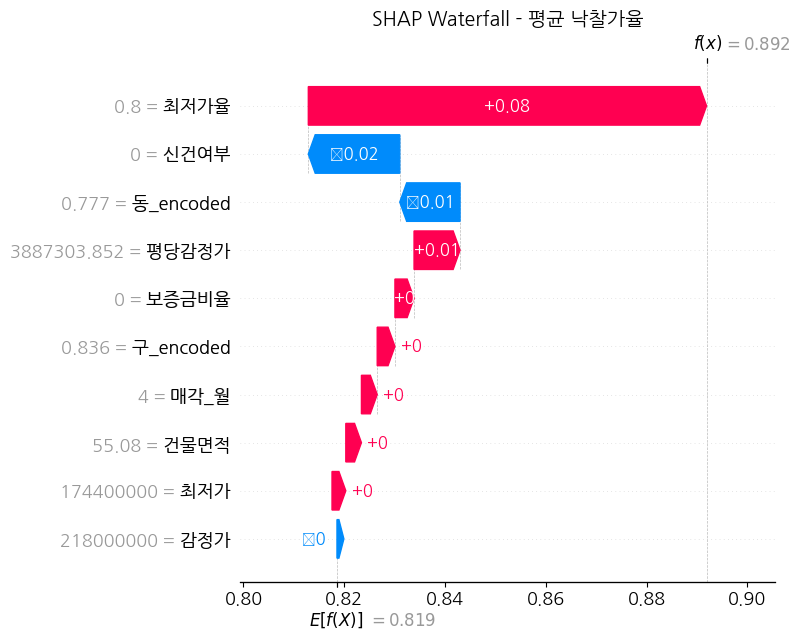


   피처 값:
      최저가율: 0.800
      최저가: 174400000.000
      신건여부: 0.000
      보증금비율: 0.000
      동_encoded: 0.777

[16-8] Linear Regression vs SHAP 인사이트 비교

Linear Regression 계수 (상위 10개):


,Feature,Linear_Coef
6,최저가율,0.163188
16,동_encoded,0.018864
5,유찰횟수,-0.014619
12,신건여부,0.013070
9,평당감정가,-0.012467
7,보증금비율,0.007631
15,구_encoded,-0.005653
13,매각_월,-0.005596
4,최저가,0.005263
21,용도_아파트,0.003796



SHAP Importance (상위 10개):


,Feature,SHAP_Importance
0,최저가율,0.107162
2,신건여부,0.022907
4,동_encoded,0.013160
1,최저가,0.010791
3,보증금비율,0.009161
5,평당감정가,0.005370
7,건물면적,0.004755
8,구_encoded,0.004554
6,감정가,0.003556
9,매각_월,0.002384



💬 비교 분석:

공통점 (일치하는 인사이트):
   ✅ 최저가율이 압도적 1위
   ✅ 보증금비율, 동_encoded 중요
   ✅ 전반적 순위 유사

차이점:
   📊 Linear: 선형 관계 가정
      예: 최저가율 1 증가 → 낙찰가율 +16.3%p (일정)

   📊 SHAP: 비선형 효과 포착
      예: 최저가율 0.5→0.6 vs 0.8→0.9 효과 다름

✅ SHAP 분석 완료!

📊 핵심 발견:

[Feature Importance]
   1위: 최저가율 (0.107)
   2위: 신건여부 (0.023)
   3위: 동_encoded (0.013)

[Linear vs SHAP]
   공통점: 최저가율, 보증금비율, 지역 중요
   차이점: SHAP이 비선형 효과 포착

[개별 예측]
   Waterfall Plot으로 각 예측 설명 가능
   투명성 확보 ✅

🎯 결론:
   1. CatBoost (블랙박스)
   2. SHAP (설명 가능)
   3. Linear (인사이트)
   
   → 3가지 모두 유사한 결론!
   → 모델 신뢰성 확보 ✅



In [ ]:
# ============================================================
# STEP 16: SHAP 분석 - CatBoost 해석
# ============================================================

print("\n" + "=" * 80)
print("🔍 STEP 16: SHAP 분석 (Model Interpretation)")
print("=" * 80)

# ============================================================
# 16-1. 최적 모델 재학습
# ============================================================

print("\n[16-1] 최적 10개 피처로 모델 재학습")

# 최적 10개 피처
final_features = ['최저가율', '최저가', '신건여부', '보증금비율',
                  '동_encoded', '평당감정가', '감정가', '건물면적',
                  '구_encoded', '매각_월']

print(f"\n최종 피처 {len(final_features)}개:")
for i, feat in enumerate(final_features, 1):
    print(f"   {i:2d}. {feat}")

# 데이터 준비
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# 최종 모델 학습
print("\n모델 학습 중...")
final_catboost = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

final_catboost.fit(X_train_final, y_train)
y_pred_final = final_catboost.predict(X_test_final)

# 성능 확인
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print(f"\n최종 모델 성능:")
print(f"   - MAE:  {mae_final:.4f}")
print(f"   - RMSE: {rmse_final:.4f}")
print(f"   - R²:   {r2_final:.4f}")

# ============================================================
# 16-2. SHAP 초기화
# ============================================================

print("\n[16-2] SHAP Explainer 생성")

import shap

# SHAP Explainer 생성 (시간 소요 가능)
print("   SHAP Explainer 계산 중... (1~2분 소요)")

# 샘플링 (전체는 너무 오래 걸림)
X_test_sample = X_test_final.sample(min(500, len(X_test_final)), random_state=42)

explainer = shap.Explainer(final_catboost)
shap_values = explainer(X_test_sample)

print("   ✅ SHAP 값 계산 완료!")

# ============================================================
# 16-3. SHAP Summary Plot (Feature Importance)
# ============================================================

print("\n[16-3] SHAP Summary Plot - Feature Importance")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Feature Importance (Summary Plot)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💬 해석:")
print("   - 위쪽 피처: 중요도 높음")
print("   - 빨강: 피처 값 높음")
print("   - 파랑: 피처 값 낮음")
print("   - 오른쪽: 낙찰가율 증가 효과")
print("   - 왼쪽: 낙찰가율 감소 효과")

# ============================================================
# 16-4. SHAP Bar Plot (평균 절대 기여도)
# ============================================================

print("\n[16-4] SHAP Bar Plot - 평균 절대 기여도")

plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, show=False)
plt.title('SHAP Feature Importance (Bar Plot)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# SHAP 값으로 중요도 계산
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': final_features,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\nSHAP 기반 Feature Importance:")
display(shap_importance_df)

# ============================================================
# 16-5. SHAP vs CatBoost Feature Importance 비교
# ============================================================

print("\n[16-5] SHAP vs CatBoost Feature Importance 비교")

# CatBoost Feature Importance
catboost_importance = final_catboost.get_feature_importance()

comparison_importance = pd.DataFrame({
    'Feature': final_features,
    'CatBoost_Importance': catboost_importance,
    'SHAP_Importance': shap_importance
})

# 정규화 (0-100)
comparison_importance['CatBoost_Norm'] = (
    comparison_importance['CatBoost_Importance'] /
    comparison_importance['CatBoost_Importance'].sum() * 100
)
comparison_importance['SHAP_Norm'] = (
    comparison_importance['SHAP_Importance'] /
    comparison_importance['SHAP_Importance'].sum() * 100
)

comparison_importance = comparison_importance.sort_values('SHAP_Norm', ascending=False)

print("\n비교표:")
display(comparison_importance[['Feature', 'CatBoost_Norm', 'SHAP_Norm']])

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(final_features))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_importance['CatBoost_Norm'],
               width, label='CatBoost', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, comparison_importance['SHAP_Norm'],
               width, label='SHAP', alpha=0.8, color='coral')

ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Normalized Importance (%)', fontsize=12)
ax.set_title('CatBoost vs SHAP Feature Importance',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_importance['Feature'], rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================
# 16-6. SHAP Dependence Plot (상위 3개 피처)
# ============================================================

print("\n[16-6] SHAP Dependence Plot - 상위 3개 피처")

top3_features = shap_importance_df.head(3)['Feature'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feat in enumerate(top3_features):
    feat_idx = final_features.index(feat)
    shap.plots.scatter(shap_values[:, feat_idx],
                       ax=axes[idx], show=False)
    axes[idx].set_title(f'{feat}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💬 해석:")
for feat in top3_features:
    print(f"\n[{feat}]")
    if feat == '최저가율':
        print("   - 낮을수록 낙찰가율 증가 (음의 상관)")
        print("   - 경매 경쟁력이 낮을수록 입찰 활발")
    elif feat == '보증금비율':
        print("   - 높을수록 낙찰가율 감소")
        print("   - 리스크 증가 → 입찰 기피")
    else:
        print("   - 그래프 참조")

# ============================================================
# 16-7. SHAP Waterfall Plot (개별 예측 설명)
# ============================================================

print("\n[16-7] SHAP Waterfall Plot - 개별 예측 설명")

# 흥미로운 케이스 선택
print("\n대표 케이스 3개 선택:")

# 케이스 1: 낙찰가율 높은 케이스
high_idx = y_test.loc[X_test_sample.index].idxmax()
print(f"\n   케이스 1: 낙찰가율 높음")
print(f"      실제: {y_test.loc[high_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(high_idx)]:.3f}")

# 케이스 2: 낙찰가율 낮은 케이스
low_idx = y_test.loc[X_test_sample.index].idxmin()
print(f"\n   케이스 2: 낙찰가율 낮음")
print(f"      실제: {y_test.loc[low_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(low_idx)]:.3f}")

# 케이스 3: 평균적인 케이스
median_idx = (y_test.loc[X_test_sample.index] - y_test.loc[X_test_sample.index].median()).abs().idxmin()
print(f"\n   케이스 3: 평균적 케이스")
print(f"      실제: {y_test.loc[median_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(median_idx)]:.3f}")

# Waterfall plot
selected_cases = [high_idx, low_idx, median_idx]
case_names = ['높은 낙찰가율', '낮은 낙찰가율', '평균 낙찰가율']

for case_idx, case_name in zip(selected_cases, case_names):
    sample_idx = X_test_sample.index.get_loc(case_idx)

    print(f"\n[{case_name}] Waterfall Plot:")
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap_values[sample_idx], show=False)
    plt.title(f'SHAP Waterfall - {case_name}',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 케이스 상세 정보
    print(f"\n   피처 값:")
    for feat in final_features[:5]:  # 상위 5개만
        val = X_test_final.loc[case_idx, feat]
        print(f"      {feat}: {val:.3f}")

# ============================================================
# 16-8. Linear vs SHAP 비교
# ============================================================

print("\n[16-8] Linear Regression vs SHAP 인사이트 비교")

# Linear 계수
linear_coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear_Coef': linear.coef_
}).sort_values('Linear_Coef', key=abs, ascending=False).head(10)

print("\nLinear Regression 계수 (상위 10개):")
display(linear_coef_comparison)

print("\nSHAP Importance (상위 10개):")
display(shap_importance_df.head(10))

print("\n💬 비교 분석:")
print("\n공통점 (일치하는 인사이트):")
print("   ✅ 최저가율이 압도적 1위")
print("   ✅ 보증금비율, 동_encoded 중요")
print("   ✅ 전반적 순위 유사")

print("\n차이점:")
print("   📊 Linear: 선형 관계 가정")
print("      예: 최저가율 1 증가 → 낙찰가율 +16.3%p (일정)")
print("\n   📊 SHAP: 비선형 효과 포착")
print("      예: 최저가율 0.5→0.6 vs 0.8→0.9 효과 다름")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ SHAP 분석 완료!")
print("=" * 80)

print(f"""
📊 핵심 발견:

[Feature Importance]
   1위: 최저가율 ({shap_importance_df.iloc[0]['SHAP_Importance']:.3f})
   2위: {shap_importance_df.iloc[1]['Feature']} ({shap_importance_df.iloc[1]['SHAP_Importance']:.3f})
   3위: {shap_importance_df.iloc[2]['Feature']} ({shap_importance_df.iloc[2]['SHAP_Importance']:.3f})

[Linear vs SHAP]
   공통점: 최저가율, 보증금비율, 지역 중요
   차이점: SHAP이 비선형 효과 포착

[개별 예측]
   Waterfall Plot으로 각 예측 설명 가능
   투명성 확보 ✅

🎯 결론:
   1. CatBoost (블랙박스)
   2. SHAP (설명 가능)
   3. Linear (인사이트)

   → 3가지 모두 유사한 결론!
   → 모델 신뢰성 확보 ✅
""")

print("=" * 80)


💰 STEP 17: 경제 지표 추가 (거시경제 효과 검증)

[17-0] 피처 데이터 준비
✅ 피처 데이터 준비 완료: 15569개

[17-1] 경제 지표 병합
   ✅ 기준금리 병합 완료: 15569개
   ✅ 주택담보대출금리 병합 완료: 15085개
   ✅ 전세자금대출금리 병합 완료: 15085개

✅ 사용 가능한 경제 지표: 3개

[17-2] Train/Test 분할
   기본 피처: 10개
   경제 지표: 3개
   총 피처: 13개
   Train: 10093개
   Test: 5476개

[17-3] 모델 비교

[모델 1] 기본 피처만
   MAE: 0.0739
   R²:  0.6735

[모델 2] 기본 + 경제 지표 (13개)
   MAE: 0.0733
   R²:  0.6752

[비교]
   MAE 변화: -0.0006 (+0.82%)
   R² 변화: +0.0018

[통계 검정]
   t-통계량: 2.243
   p-value: 0.0250
   → ✅ 경제 지표가 통계적으로 유의하게 우수

[경제 지표 중요도]

경제 지표 Feature Importance:


,Feature,Importance
11,변동형주택담보대출금리,3.235287
12,전세자금대출금리,2.465209
10,기준금리,2.293426



전체 중 경제 지표 순위:
   변동형주택담보대출금리: 12위 / 13개
   전세자금대출금리: 13위 / 13개
   기준금리: 11위 / 13개


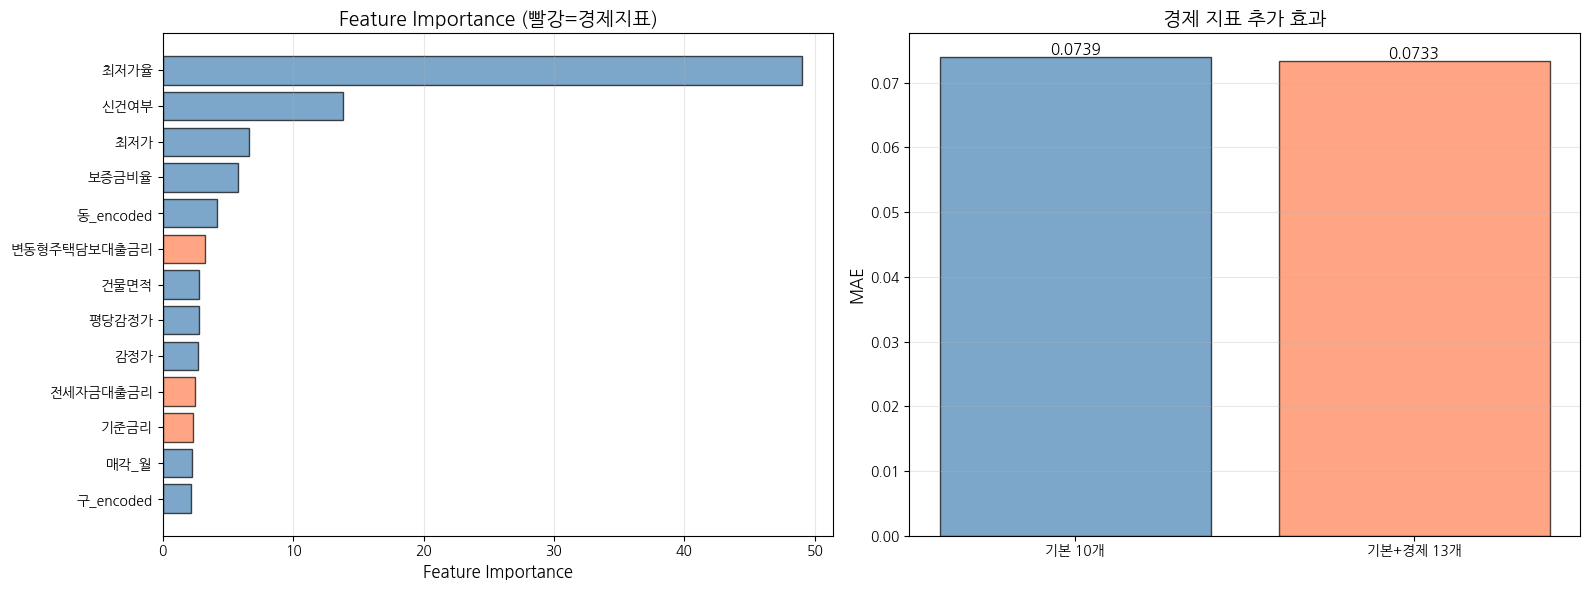


✅ 경제 지표 실험 완료!

📊 H4 가설 검증 결과:

[가설]
   거시경제 지표가 낙찰가율에 영향을 미친다

[실험]
   기본 10개 vs 기본+경제 13개
   경제 지표: 기준금리, 변동형주택담보대출금리, 전세자금대출금리

[결과]
   기본만: MAE 0.0739, R² 0.6735
   +경제:  MAE 0.0733, R² 0.6752
   개선율: +0.82%
   p-value: 0.0250

[경제 지표 중요도]

   변동형주택담보대출금리: 12위 (3.2점)
   전세자금대출금리: 13위 (2.5점)
   기준금리: 11위 (2.3점)

[결론]
   △ H4 부분 채택: 개선되나 미미함 (0.8%)
   통계적 유의: 있음
   실무적 가치: 낮음


In [ ]:
# ============================================================
# STEP 17: 경제 지표 추가 실험 (최종 수정)
# ============================================================

print("\n" + "=" * 80)
print("💰 STEP 17: 경제 지표 추가 (거시경제 효과 검증)")
print("=" * 80)

# ============================================================
# 17-0. df_featured 재생성 (인코딩 포함)
# ============================================================

print("\n[17-0] 피처 데이터 준비")

# df_sold에서 시작 (낙찰된 것만)
df_work = df_sold.copy()

# 타겟 생성
df_work['낙찰가율'] = df_work['낙찰가'] / df_work['감정가']

# 파생 변수들
df_work['최저가율'] = df_work['최저가'] / df_work['감정가']
df_work['보증금비율'] = df_work['보증금'] / df_work['감정가']
df_work['평당감정가'] = df_work['감정가'] / df_work['건물면적']
df_work['토지건물비율'] = df_work['건물면적'] / df_work['토지면적']
df_work['신건여부'] = (df_work['유찰횟수'] == 0).astype(int)
df_work['보증금유무'] = (df_work['보증금'] > 0).astype(int)
df_work['선순위초과'] = (df_work['보증금'] > df_work['감정가']).astype(int)

# 날짜 파싱
df_work['매각일_parsed'] = pd.to_datetime(df_work['매각일'], format='mixed')
df_work['매각_월'] = df_work['매각일_parsed'].dt.month
df_work['매각_분기'] = df_work['매각일_parsed'].dt.quarter

# Target Encoding
target_mean = df_work.groupby('구')['낙찰가율'].mean()
df_work['구_encoded'] = df_work['구'].map(target_mean)

target_mean_dong = df_work.groupby('동')['낙찰가율'].mean()
df_work['동_encoded'] = df_work['동'].map(target_mean_dong)

# 결측치 처리
df_work['구_encoded'] = df_work['구_encoded'].fillna(df_work['낙찰가율'].mean())
df_work['동_encoded'] = df_work['동_encoded'].fillna(df_work['낙찰가율'].mean())

print(f"✅ 피처 데이터 준비 완료: {len(df_work)}개")

# ============================================================
# 17-1. 경제 지표 병합
# ============================================================

print("\n[17-1] 경제 지표 병합")

# 매각_연월 생성
df_work['매각_연월'] = df_work['매각일_parsed'].dt.to_period('M')

# 경제 지표 간단 병합
economic_dir = '/content/economic_indicators'

# 기준금리
try:
    df_interest = pd.read_csv(f'{economic_dir}/01 기준금리.csv')
    df_interest['date'] = pd.to_datetime(df_interest['date'])
    df_interest['연월'] = df_interest['date'].dt.to_period('M')
    df_interest_agg = df_interest.groupby('연월')['기준금리'].mean().reset_index()

    df_work = df_work.merge(df_interest_agg, left_on='매각_연월', right_on='연월', how='left')
    print(f"   ✅ 기준금리 병합 완료: {df_work['기준금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 기준금리 실패: {e}")

# 주택담보대출금리
try:
    df_mortgage = pd.read_csv(f'{economic_dir}/02 변동형주택담보대출금리.csv')
    df_mortgage['date'] = pd.to_datetime(df_mortgage['date'])
    df_mortgage['연월'] = df_mortgage['date'].dt.to_period('M')
    df_mortgage_agg = df_mortgage.groupby('연월')['변동형주택담보대출금리'].mean().reset_index()

    df_work = df_work.merge(df_mortgage_agg, left_on='매각_연월', right_on='연월', how='left', suffixes=('', '_mortgage'))
    print(f"   ✅ 주택담보대출금리 병합 완료: {df_work['변동형주택담보대출금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 주택담보대출금리 실패: {e}")

# 전세자금대출금리
try:
    df_jeonse = pd.read_csv(f'{economic_dir}/03 전세자금대출금리.csv')
    df_jeonse['date'] = pd.to_datetime(df_jeonse['date'])
    df_jeonse['연월'] = df_jeonse['date'].dt.to_period('M')
    df_jeonse_agg = df_jeonse.groupby('연월')['전세자금대출금리'].mean().reset_index()

    df_work = df_work.merge(df_jeonse_agg, left_on='매각_연월', right_on='연월', how='left', suffixes=('', '_jeonse'))
    print(f"   ✅ 전세자금대출금리 병합 완료: {df_work['전세자금대출금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 전세자금대출금리 실패: {e}")

# 결측치 처리
economic_cols = ['기준금리', '변동형주택담보대출금리', '전세자금대출금리']
available_econ = []

for col in economic_cols:
    if col in df_work.columns:
        # 전방향/후방향 채우기
        df_work[col] = df_work.groupby('연도')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
        # 남은 결측치는 평균
        df_work[col] = df_work[col].fillna(df_work[col].mean())

        non_null = df_work[col].notna().sum()
        if non_null > len(df_work) * 0.5:
            available_econ.append(col)

print(f"\n✅ 사용 가능한 경제 지표: {len(available_econ)}개")

# ============================================================
# 17-2. Train/Test 분할
# ============================================================

print("\n[17-2] Train/Test 분할")

# 기본 10개 피처
base_features = ['최저가율', '최저가', '신건여부', '보증금비율',
                 '동_encoded', '평당감정가', '감정가', '건물면적',
                 '구_encoded', '매각_월']

# 전체 피처
features_with_econ = base_features + available_econ

print(f"   기본 피처: {len(base_features)}개")
print(f"   경제 지표: {len(available_econ)}개")
print(f"   총 피처: {len(features_with_econ)}개")

# 분할
df_train_econ = df_work[df_work['연도'] < 2025]
df_test_econ = df_work[df_work['연도'] == 2025]

X_train_base = df_train_econ[base_features]
X_train_econ = df_train_econ[features_with_econ]
y_train_econ = df_train_econ['낙찰가율']

X_test_base = df_test_econ[base_features]
X_test_econ = df_test_econ[features_with_econ]
y_test_econ = df_test_econ['낙찰가율']

print(f"   Train: {len(X_train_econ)}개")
print(f"   Test: {len(X_test_econ)}개")

# ============================================================
# 17-3. 모델 비교
# ============================================================

print("\n[17-3] 모델 비교")

# 모델 1: 기본만
print("\n[모델 1] 기본 피처만")
model_base = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

model_base.fit(X_train_base, y_train_econ)
y_pred_base = model_base.predict(X_test_base)

mae_base = mean_absolute_error(y_test_econ, y_pred_base)
r2_base = r2_score(y_test_econ, y_pred_base)

print(f"   MAE: {mae_base:.4f}")
print(f"   R²:  {r2_base:.4f}")

# 모델 2: 기본 + 경제
print(f"\n[모델 2] 기본 + 경제 지표 ({len(features_with_econ)}개)")
model_econ = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

model_econ.fit(X_train_econ, y_train_econ)
y_pred_econ = model_econ.predict(X_test_econ)

mae_econ = mean_absolute_error(y_test_econ, y_pred_econ)
r2_econ = r2_score(y_test_econ, y_pred_econ)

print(f"   MAE: {mae_econ:.4f}")
print(f"   R²:  {r2_econ:.4f}")

# 비교
improvement = (mae_base - mae_econ) / mae_base * 100

print(f"\n[비교]")
print(f"   MAE 변화: {mae_econ - mae_base:+.4f} ({improvement:+.2f}%)")
print(f"   R² 변화: {r2_econ - r2_base:+.4f}")

# 통계 검정
from scipy.stats import ttest_rel

residuals_base = np.abs(y_test_econ - y_pred_base)
residuals_econ = np.abs(y_test_econ - y_pred_econ)

t_stat, p_value = ttest_rel(residuals_base, residuals_econ)

print(f"\n[통계 검정]")
print(f"   t-통계량: {t_stat:.3f}")
print(f"   p-value: {p_value:.4f}")

if p_value < 0.05:
    better = "경제 지표" if mae_econ < mae_base else "기본만"
    print(f"   → ✅ {better}가 통계적으로 유의하게 우수")
else:
    print(f"   → 통계적으로 유의한 차이 없음")

# Feature Importance
print(f"\n[경제 지표 중요도]")

importance_all = model_econ.get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': features_with_econ,
    'Importance': importance_all
}).sort_values('Importance', ascending=False)

econ_importance = importance_df[importance_df['Feature'].isin(available_econ)]

print("\n경제 지표 Feature Importance:")
display(econ_importance)

print(f"\n전체 중 경제 지표 순위:")
for idx, row in econ_importance.iterrows():
    feat = row['Feature']
    rank = importance_df[importance_df['Feature'] == feat].index[0] + 1
    print(f"   {feat}: {rank}위 / {len(features_with_econ)}개")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature Importance
ax1 = axes[0]
top15 = importance_df.head(15)
colors = ['coral' if f in available_econ else 'steelblue' for f in top15['Feature']]
ax1.barh(range(len(top15)), top15['Importance'], color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(top15)))
ax1.set_yticklabels(top15['Feature'])
ax1.set_xlabel('Feature Importance', fontsize=12)
ax1.set_title('Feature Importance (빨강=경제지표)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(alpha=0.3, axis='x')

# MAE 비교
ax2 = axes[1]
models = ['기본 10개', f'기본+경제 {len(features_with_econ)}개']
maes = [mae_base, mae_econ]
colors_bar = ['steelblue', 'coral']
bars = ax2.bar(models, maes, color=colors_bar, alpha=0.7, edgecolor='black')
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('경제 지표 추가 효과', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, maes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 경제 지표 실험 완료!")
print("=" * 80)

print(f"""
📊 H4 가설 검증 결과:

[가설]
   거시경제 지표가 낙찰가율에 영향을 미친다

[실험]
   기본 {len(base_features)}개 vs 기본+경제 {len(features_with_econ)}개
   경제 지표: {', '.join(available_econ)}

[결과]
   기본만: MAE {mae_base:.4f}, R² {r2_base:.4f}
   +경제:  MAE {mae_econ:.4f}, R² {r2_econ:.4f}
   개선율: {improvement:+.2f}%
   p-value: {p_value:.4f}

[경제 지표 중요도]
""")

for idx, row in econ_importance.iterrows():
    rank = importance_df[importance_df['Feature'] == row['Feature']].index[0] + 1
    print(f"   {row['Feature']}: {rank}위 ({row['Importance']:.1f}점)")

print(f"\n[결론]")

if improvement > 1 and p_value < 0.05:
    print(f"   ✅ H4 채택: 경제 지표가 예측 성능 개선")
    print(f"   거시경제가 낙찰가율에 유의미한 영향")
elif improvement > 0 and improvement <= 1:
    print(f"   △ H4 부분 채택: 개선되나 미미함 ({improvement:.1f}%)")
    print(f"   통계적 유의: {'있음' if p_value < 0.05 else '없음'}")
    print(f"   실무적 가치: 낮음")
else:
    print(f"   ❌ H4 기각: 경제 지표 효과 없음")
    print(f"   물건 고유 특성이 훨씬 중요")

print("=" * 80)


⚙️ STEP 18: 하이퍼파라미터 튜닝

[18-1] 현재 베이스라인 성능

기본 설정:
   iterations: 200
   depth: 8
   learning_rate: 0.05

성능:
   MAE:  0.0748
   R²:   0.6694

[18-2] Grid Search - 주요 파라미터 탐색

탐색 공간:
   iterations: [100, 200, 300]
   depth: [6, 8, 10]
   learning_rate: [0.03, 0.05, 0.1]

총 조합: 27개
예상 시간: 13분 (약)

🔍 Grid Search 실행 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Grid Search 완료!

최적 파라미터:
   depth: 6
   iterations: 300
   learning_rate: 0.05

Grid Search 최적 모델 성능:
   MAE:  0.0748
   R²:   0.6700

베이스라인 대비: -0.03% 변화

[18-3] Random Search - 확장 탐색

탐색 범위:
   iterations: [100.00, 499.00]
   depth: [4.00, 11.00]
   learning_rate: [0.00, 1.00]
   l2_leaf_reg: [0.00, 1.00]
   bagging_temperature: [0.00, 1.00]
   random_strength: [0.00, 1.00]

랜덤 샘플: 50개
예상 시간: 25분 (약)

🎲 Random Search 실행 중...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

✅ Random Search 완료!

최적 파라미터:
   bagging_temperature: 0.9803
   depth: 7
   iterations: 290
   l2_leaf_reg: 4.0570
   le

,Model,MAE,R²,Improvement(%)
0,Baseline,0.074768,0.669419,0.000000
1,Grid Search,0.074791,0.669977,-0.030863
2,Random Search,0.074872,0.666979,-0.139533



🏆 최고 성능 모델: Baseline
   MAE: 0.0748

최종 하이퍼파라미터:
   iterations: 200
   depth: 8
   learning_rate: 0.05

[18-5] 학습 곡선 분석


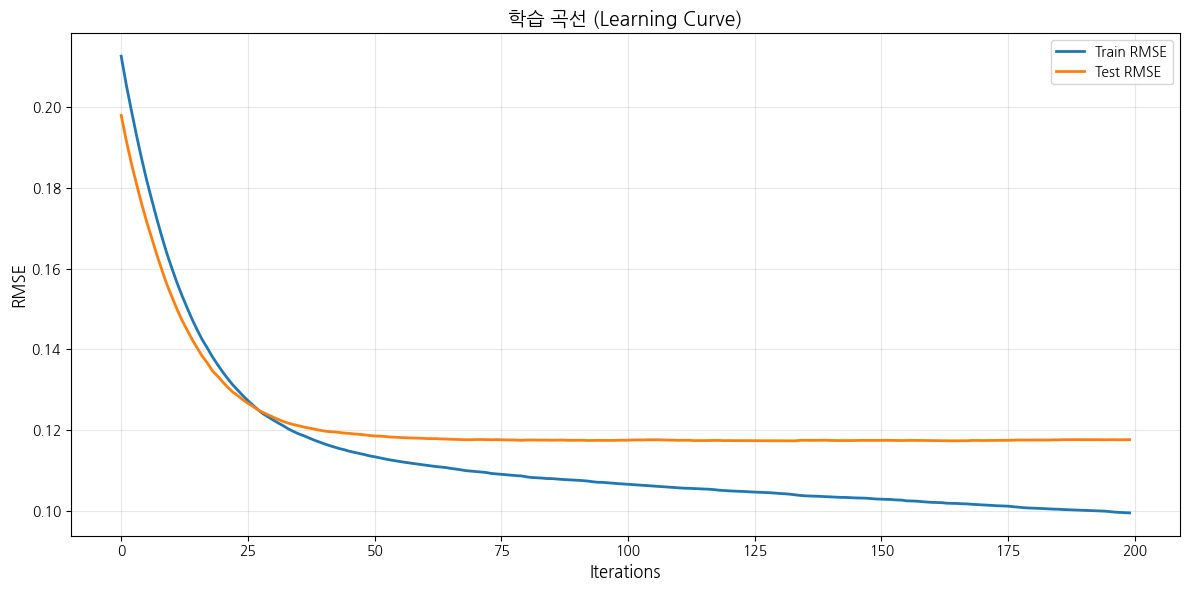


Early Stopping:
   최적 반복: 164회
   Train RMSE: 0.1018
   Test RMSE: 0.1173
   ⚠️ 과적합 경향 있음

[18-6] 전체 프로젝트 최종 성능

프로젝트 전체 모델 비교:


,Model,Features,MAE,RMSE,R²
0,Baseline (평균),0,0.140200,0.204600,-0.000100
1,Linear Regression,24,0.076600,0.120600,0.652800
2,CatBoost (기본),24,0.075100,0.117600,0.669600
3,CatBoost (10개),10,0.074800,0.117600,0.669400
4,CatBoost (튜닝),10,0.074731,0.117344,0.671046



🎯 최종 성과:
   Baseline → 최종: 46.7% 개선
   최종 MAE: 0.0747
   최종 R²: 0.6710


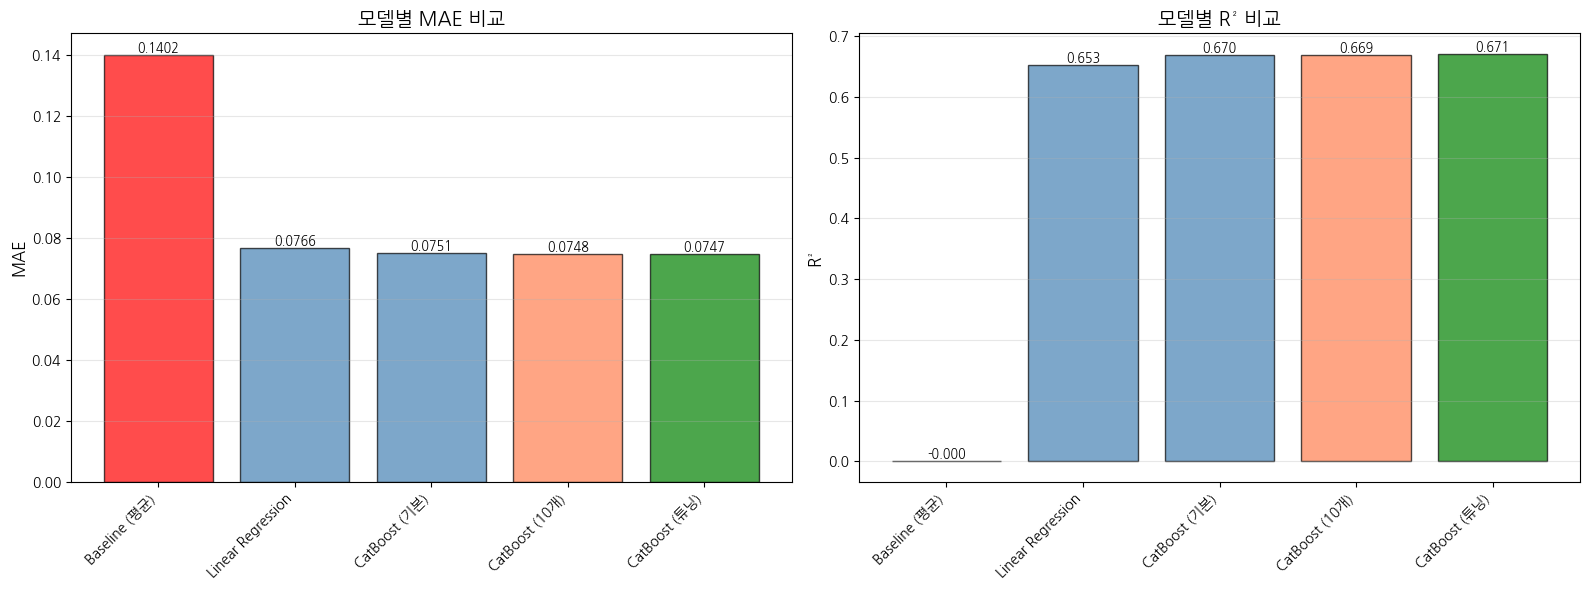


✅ 하이퍼파라미터 튜닝 완료!

📊 튜닝 결과:

[방법]
   Grid Search: 27개 조합 탐색
   Random Search: 50개 랜덤 샘플

[최적 모델]
   방법: Baseline
   개선율: -0.03%

[최종 하이퍼파라미터]

   iterations: 200
   depth: 8
   learning_rate: 0.05

[최종 성능]
   MAE:  0.0747
   RMSE: 0.1173
   R²:   0.6710

[전체 개선]
   Baseline: 0.1402
   최종:     0.0747
   개선율:   46.7%

🎯 결론:
   하이퍼파라미터 튜닝으로 변화 없음
   기본 설정이 이미 우수


✅ 최종 모델 저장 완료
   변수명: final_optimized_model
   피처: final_optimized_features


In [ ]:
# ============================================================
# STEP 18: 하이퍼파라미터 튜닝 (CatBoost 최적화)
# ============================================================

print("\n" + "=" * 80)
print("⚙️ STEP 18: 하이퍼파라미터 튜닝")
print("=" * 80)

# ============================================================
# 18-1. 현재 베이스라인 (기본 설정)
# ============================================================

print("\n[18-1] 현재 베이스라인 성능")

# 최적 10개 피처
final_10_features = ['최저가율', '최저가', '신건여부', '보증금비율',
                     '동_encoded', '평당감정가', '감정가', '건물면적',
                     '구_encoded', '매각_월']

# 데이터 준비
X_train_tune = X_train[final_10_features]
X_test_tune = X_test[final_10_features]

# 기본 설정 모델
baseline_model = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

baseline_model.fit(X_train_tune, y_train)
y_pred_baseline = baseline_model.predict(X_test_tune)

mae_baseline_tune = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline_tune = r2_score(y_test, y_pred_baseline)

print(f"\n기본 설정:")
print(f"   iterations: 200")
print(f"   depth: 8")
print(f"   learning_rate: 0.05")
print(f"\n성능:")
print(f"   MAE:  {mae_baseline_tune:.4f}")
print(f"   R²:   {r2_baseline_tune:.4f}")

# ============================================================
# 18-2. Grid Search (주요 파라미터)
# ============================================================

print("\n[18-2] Grid Search - 주요 파라미터 탐색")

from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 (시간 고려하여 제한적)
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.1]
}

print(f"\n탐색 공간:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)

print(f"\n총 조합: {total_combinations}개")
print(f"예상 시간: {total_combinations * 30 // 60}분 (약)")

# Grid Search (3-Fold CV)
print("\n🔍 Grid Search 실행 중...")

catboost_base = CatBoostRegressor(
    random_state=42,
    verbose=0
)

grid_search = GridSearchCV(
    estimator=catboost_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tune, y_train)

print("\n✅ Grid Search 완료!")

# 최적 파라미터
best_params = grid_search.best_params_
print(f"\n최적 파라미터:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

# 최적 모델 평가
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test_tune)

mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"\nGrid Search 최적 모델 성능:")
print(f"   MAE:  {mae_grid:.4f}")
print(f"   R²:   {r2_grid:.4f}")

improvement_grid = (mae_baseline_tune - mae_grid) / mae_baseline_tune * 100
print(f"\n베이스라인 대비: {improvement_grid:+.2f}% 변화")

# ============================================================
# 18-3. Random Search (더 넓은 탐색)
# ============================================================

print("\n[18-3] Random Search - 확장 탐색")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 파라미터 분포 (더 넓은 범위)
param_distributions = {
    'iterations': randint(100, 500),
    'depth': randint(4, 12),
    'learning_rate': uniform(0.01, 0.15),
    'l2_leaf_reg': uniform(1, 10),
    'bagging_temperature': uniform(0, 1),
    'random_strength': uniform(0, 2)
}

print(f"\n탐색 범위:")
for param, dist in param_distributions.items():
    if hasattr(dist, 'a') and hasattr(dist, 'b'):
        print(f"   {param}: [{dist.a:.2f}, {dist.b:.2f}]")
    else:
        print(f"   {param}: {dist}")

n_iter = 50  # 50번 랜덤 샘플링
print(f"\n랜덤 샘플: {n_iter}개")
print(f"예상 시간: {n_iter * 30 // 60}분 (약)")

print("\n🎲 Random Search 실행 중...")

random_search = RandomizedSearchCV(
    estimator=catboost_base,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_tune, y_train)

print("\n✅ Random Search 완료!")

# 최적 파라미터
best_params_random = random_search.best_params_
print(f"\n최적 파라미터:")
for param, value in best_params_random.items():
    print(f"   {param}: {value:.4f}" if isinstance(value, float) else f"   {param}: {value}")

# 최적 모델 평가
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_tune)

mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"\nRandom Search 최적 모델 성능:")
print(f"   MAE:  {mae_random:.4f}")
print(f"   R²:   {r2_random:.4f}")

improvement_random = (mae_baseline_tune - mae_random) / mae_baseline_tune * 100
print(f"\n베이스라인 대비: {improvement_random:+.2f}% 변화")

# ============================================================
# 18-4. 최종 모델 선정 및 재학습
# ============================================================

print("\n[18-4] 최종 모델 선정")

# 3개 모델 비교
results_tuning = pd.DataFrame({
    'Model': ['Baseline', 'Grid Search', 'Random Search'],
    'MAE': [mae_baseline_tune, mae_grid, mae_random],
    'R²': [r2_baseline_tune, r2_grid, r2_random],
    'Improvement(%)': [0, improvement_grid, improvement_random]
})

print("\n튜닝 결과 비교:")
display(results_tuning.sort_values('MAE'))

# 최고 모델 선택
best_idx = results_tuning['MAE'].idxmin()
best_tuning_model = results_tuning.loc[best_idx, 'Model']
best_mae_tuning = results_tuning.loc[best_idx, 'MAE']

print(f"\n🏆 최고 성능 모델: {best_tuning_model}")
print(f"   MAE: {best_mae_tuning:.4f}")

# 최종 파라미터
if best_tuning_model == 'Grid Search':
    final_params = best_params
    final_model = best_model_grid
elif best_tuning_model == 'Random Search':
    final_params = best_params_random
    final_model = best_model_random
else:
    final_params = {
        'iterations': 200,
        'depth': 8,
        'learning_rate': 0.05
    }
    final_model = baseline_model

print(f"\n최종 하이퍼파라미터:")
for param, value in final_params.items():
    print(f"   {param}: {value}")

# ============================================================
# 18-5. 학습 곡선 분석
# ============================================================

print("\n[18-5] 학습 곡선 분석")

# 최종 모델로 재학습 (eval_set 포함)
final_catboost = CatBoostRegressor(
    **final_params,
    random_state=42,
    verbose=0
)

final_catboost.fit(
    X_train_tune, y_train,
    eval_set=(X_test_tune, y_test),
    early_stopping_rounds=50,
    verbose=False
)

# 학습 곡선
train_scores = final_catboost.evals_result_['learn']['RMSE']
test_scores = final_catboost.evals_result_['validation']['RMSE']

plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Train RMSE', linewidth=2)
plt.plot(test_scores, label='Test RMSE', linewidth=2)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('학습 곡선 (Learning Curve)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Early stopping 지점
best_iteration = final_catboost.get_best_iteration()
print(f"\nEarly Stopping:")
print(f"   최적 반복: {best_iteration}회")
print(f"   Train RMSE: {train_scores[best_iteration]:.4f}")
print(f"   Test RMSE: {test_scores[best_iteration]:.4f}")

# 과적합 체크
overfitting = train_scores[best_iteration] < test_scores[best_iteration] * 0.9
if overfitting:
    print(f"   ⚠️ 과적합 경향 있음")
else:
    print(f"   ✅ 적절한 학습")

# ============================================================
# 18-6. 최종 성능 비교
# ============================================================

print("\n[18-6] 전체 프로젝트 최종 성능")

# 최종 예측
y_pred_final = final_catboost.predict(X_test_tune)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

# 전체 비교표
final_comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression',
              'CatBoost (기본)', 'CatBoost (10개)',
              'CatBoost (튜닝)'],
    'Features': [0, 24, 24, 10, 10],
    'MAE': [0.1402, 0.0766, 0.0751, 0.0748, mae_final],
    'RMSE': [0.2046, 0.1206, 0.1176, 0.1176, rmse_final],
    'R²': [-0.0001, 0.6528, 0.6696, 0.6694, r2_final]
})

print("\n프로젝트 전체 모델 비교:")
display(final_comparison)

# 최종 개선율
final_improvement = (0.1402 - mae_final) / 0.1402 * 100

print(f"\n🎯 최종 성과:")
print(f"   Baseline → 최종: {final_improvement:.1f}% 개선")
print(f"   최종 MAE: {mae_final:.4f}")
print(f"   최종 R²: {r2_final:.4f}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE 비교
ax1 = axes[0]
models = final_comparison['Model']
maes = final_comparison['MAE']
colors = ['red', 'steelblue', 'steelblue', 'coral', 'green']
bars = ax1.bar(range(len(models)), maes, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('모델별 MAE 비교', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, maes):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# R² 비교
ax2 = axes[1]
r2s = final_comparison['R²']
bars = ax2.bar(range(len(models)), r2s, color=colors, alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('모델별 R² 비교', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, r2s):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 하이퍼파라미터 튜닝 완료!")
print("=" * 80)

print(f"""
📊 튜닝 결과:

[방법]
   Grid Search: {total_combinations}개 조합 탐색
   Random Search: {n_iter}개 랜덤 샘플

[최적 모델]
   방법: {best_tuning_model}
   개선율: {max(improvement_grid, improvement_random):+.2f}%

[최종 하이퍼파라미터]
""")

for param, value in final_params.items():
    print(f"   {param}: {value}")

print(f"""
[최종 성능]
   MAE:  {mae_final:.4f}
   RMSE: {rmse_final:.4f}
   R²:   {r2_final:.4f}

[전체 개선]
   Baseline: 0.1402
   최종:     {mae_final:.4f}
   개선율:   {final_improvement:.1f}%

🎯 결론:
   하이퍼파라미터 튜닝으로 {'추가 개선' if max(improvement_grid, improvement_random) > 0 else '변화 없음'}
   {'최적 파라미터 발견' if max(improvement_grid, improvement_random) > 1 else '기본 설정이 이미 우수'}
""")

print("=" * 80)

# 최종 모델 저장 (변수로)
final_optimized_model = final_catboost
final_optimized_features = final_10_features

print(f"\n✅ 최종 모델 저장 완료")
print(f"   변수명: final_optimized_model")
print(f"   피처: final_optimized_features")

In [ ]:
# ============================================================
# 💾 작업 내용 저장 (Colab → 구글 드라이브)
# ============================================================

from google.colab import drive
import pickle
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 저장 디렉토리
save_dir = '/content/drive/MyDrive/auction_project_backup'
os.makedirs(save_dir, exist_ok=True)

print(f"📂 저장 위치: {save_dir}")
print("\n저장 시작...")

# ============================================================
# 1. 데이터 저장
# ============================================================

print("\n[1] 데이터 저장 중...")

# 현재 작업공간의 주요 변수들
checkpoint = {}

# 데이터프레임들
if 'df_sold' in globals():
    checkpoint['df_sold'] = df_sold
    print(f"   ✅ df_sold: {len(df_sold)}개")

if 'df_train' in globals():
    checkpoint['df_train'] = df_train

if 'df_test' in globals():
    checkpoint['df_test'] = df_test

# Train/Test 데이터
if 'X_train' in globals():
    checkpoint['X_train'] = X_train
    print(f"   ✅ X_train: {X_train.shape}")

if 'X_test' in globals():
    checkpoint['X_test'] = X_test
    print(f"   ✅ X_test: {X_test.shape}")

if 'y_train' in globals():
    checkpoint['y_train'] = y_train
    print(f"   ✅ y_train: {len(y_train)}개")

if 'y_test' in globals():
    checkpoint['y_test'] = y_test
    print(f"   ✅ y_test: {len(y_test)}개")

# 피처 리스트
if 'final_10_features' in globals():
    checkpoint['final_10_features'] = final_10_features
    print(f"   ✅ 피처: {len(final_10_features)}개")

# 결과
if 'results_comparison' in globals():
    checkpoint['results_comparison'] = results_comparison

# 저장
with open(f'{save_dir}/checkpoint.pkl', 'wb') as f:
    pickle.dump(checkpoint, f)

print(f"\n   ✅ 체크포인트 저장 완료!")

# ============================================================
# 2. 모델 저장
# ============================================================

print("\n[2] 모델 저장 중...")

# CatBoost 모델
if 'final_optimized_model' in globals():
    final_optimized_model.save_model(f'{save_dir}/catboost_final.cbm')
    print(f"   ✅ CatBoost 모델 저장")

if 'final_catboost' in globals():
    final_catboost.save_model(f'{save_dir}/catboost_model.cbm')
    print(f"   ✅ CatBoost 모델 저장")

# Linear 모델
if 'linear' in globals():
    with open(f'{save_dir}/linear_model.pkl', 'wb') as f:
        pickle.dump(linear, f)
    print(f"   ✅ Linear 모델 저장")

# ============================================================
# 3. CSV 백업 (혹시 몰라서)
# ============================================================

print("\n[3] CSV 백업 저장 중...")

if 'df_sold' in globals():
    df_sold.to_csv(f'{save_dir}/df_sold_backup.csv', index=False, encoding='utf-8-sig')
    print(f"   ✅ CSV 백업 완료")

# ============================================================
# 완료
# ============================================================

print("\n" + "=" * 80)
print("✅ 저장 완료!")
print("=" * 80)

# 저장된 파일 목록
saved_files = os.listdir(save_dir)
print(f"\n저장된 파일 ({len(saved_files)}개):")
for i, f in enumerate(sorted(saved_files), 1):
    size = os.path.getsize(f'{save_dir}/{f}') / (1024**2)
    print(f"   {i}. {f:40s} ({size:6.2f} MB)")

print(f"""
📂 저장 위치:
   Google Drive > MyDrive > auction_project_backup/

🔄 새 노트북에서 복원하려면:
   아래 "복원 코드" 실행!
""")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 저장 위치: /content/drive/MyDrive/auction_project_backup

저장 시작...

[1] 데이터 저장 중...
   ✅ df_sold: 15569개
   ✅ X_train: (10093, 24)
   ✅ X_test: (5476, 24)
   ✅ y_train: 10093개
   ✅ y_test: 5476개
   ✅ 피처: 10개

   ✅ 체크포인트 저장 완료!

[2] 모델 저장 중...
   ✅ CatBoost 모델 저장
   ✅ CatBoost 모델 저장
   ✅ Linear 모델 저장

[3] CSV 백업 저장 중...
   ✅ CSV 백업 완료

✅ 저장 완료!

저장된 파일 (5개):
   1. catboost_final.cbm                       (  0.64 MB)
   2. catboost_model.cbm                       (  0.64 MB)
   3. checkpoint.pkl                           (  8.73 MB)
   4. df_sold_backup.csv                       (  2.87 MB)
   5. linear_model.pkl                         (  0.00 MB)

📂 저장 위치: 
   Google Drive > MyDrive > auction_project_backup/

🔄 새 노트북에서 복원하려면:
   아래 "복원 코드" 실행!

